In [27]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

from collections import Counter
import numpy as np
import os
import pandas as pd

import scipy   
from scipy import stats


def format_axis(ax):   
    for pos in ['right', 'top', 'left']:
        ax.spines[pos].set_edgecolor('white')    
    ax.tick_params(axis='x', length=6, width=2, colors='black')
    ax.tick_params(axis='y', length=6, width=2, colors='black') 
  

def getLogBinnedDistribution(x, y, nbins):
    bins   = 10 ** np.linspace(np.log10(min(x)), np.log10(max(x)), nbins)  
    values = [ np.mean([y[j]  for j in range(len(x)) if x[j] >= bins[i] and x[j] < bins[i+1]])  for i in range(nbins-1)]    
    error  = [ np.std( [y[j]  for j in range(len(x)) if x[j] >= bins[i] and x[j] < bins[i+1]])  for i in range(nbins-1)]
    bins   = (bins[1:] + bins[:-1])/2
    return bins, values, error


def getDistribution(keys, normalized = True):   
    uniq_keys = np.unique(keys)
    bins = uniq_keys.searchsorted(keys)
    distr = np.bincount(bins) 
    if normalized == 1: distr = distr/float(np.sum(distr)) 
    return np.asarray(uniq_keys.tolist()), np.asarray(distr.tolist())    
    
    
def getPercentileBinnedDistribution(x, y, nbins):
    x, y = zip(*sorted(zip(x, y), key=lambda tup: tup[0]))
    elements_per_bin = int(len(x)/float(nbins))
    xx  = [np.mean(x[i*elements_per_bin:(i+1)*elements_per_bin]) for i in range(nbins)]
    yy  = [np.mean(y[i*elements_per_bin:(i+1)*elements_per_bin]) for i in range(nbins)]
    std = [np.std(y[i*elements_per_bin:(i+1)*elements_per_bin])  for i in range(nbins)]
    return xx, yy, std


def getBinnedDistribution(x, y, nbins):
    x = np.asarray(x)
    y = np.asarray(y)
    n, bins   = np.histogram(x, bins=nbins)
    sy, _  = np.histogram(x, bins=nbins, weights=y)
    sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
    mean = sy/n
    std  = np.sqrt(sy2/n - mean*mean) 
    bins = (_[1:] + _[:-1])/2
    return bins, mean, std

    


labelfont  = 22
tickfont   = 17
legendfont = 15

color_b = '#80b1d3'
color_r = '#fb8072'
color_g = '#8dd3c7'


def get_date(s):
    return datetime.datetime.strptime(s, '%Y-%m-%d %H:%M:%S')



def get_year_m(s):
    return datetime.datetime.strptime(s, '%Y')

## Distribution of the number of occurances / name-variant

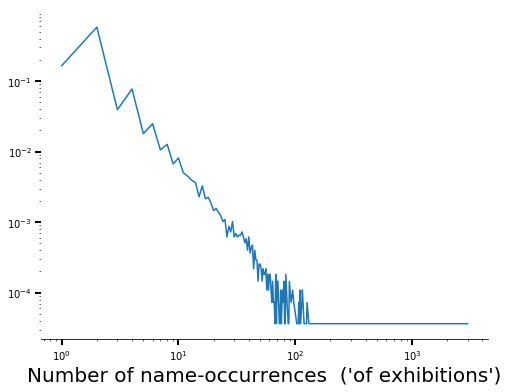

In [58]:
cnt = []
name_cnt = []
for line in open('Ikon/extracted/all_artists_cnt.dat'):
    fields = line.strip().split('\t')
    if len(fields) == 2:
        cnt.append(int(fields[1]))   
        name_cnt.append((fields[0], int(fields[1])))
        
f, ax = plt.subplots(1,1,figsize=(8,6))


x, y = getDistribution(cnt)
ax.plot(x,y)
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel('Number of name-occurrences  (\'of exhibitions\')', fontsize = 20)


format_axis(ax)

#for a, b in :
#    print(a,'\t', b)

cntr = Counter(cnt)

#for a, b in dict(cntr).items():
#    print(a,'\t\t\t', b)



## Top name-variants (names are not cleaned)

In [65]:
name_cnt = sorted(name_cnt, key = lambda tup: tup[1], reverse = True)
for ind, (a, b) in enumerate(name_cnt):
    print(ind, '\t',a,'\t', b)

0 	 -, 	 2984
1 	 - 	 2002
2 	 Koronczi Endre, 	 149
3 	 művészettörténész 	 135
4 	 Nádler István, 	 131
5 	 Szombathy Bálint 	 126
6 	 Maurer Dóra, 	 126
7 	 Sugár János, 	 125
8 	 Bukta Imre, 	 123
9 	 Koroknai Zsolt, 	 119
10 	 Kerekes Gábor, 	 115
11 	 Gerhes Gábor, 	 115
12 	 Csontó Lajos, 	 115
13 	 Török Tamás, 	 114
14 	 Győrffy László, 	 114
15 	 Mélyi József 	 111
16 	 Szirtes János, 	 110
17 	 Bánki Ákos, 	 110
18 	 --- 	 110
19 	 Horváth Judit, 	 109
20 	 Gerber Pál, 	 108
21 	 HAász Ágnes, 	 108
22 	 Muladi Brigitta, 	 107
23 	 Kaszás Tamás, 	 107
24 	 Eperjesi Ágnes, 	 106
25 	 Bak Imre, 	 103
26 	 Verebes György, 	 97
27 	 Nemes Csaba, 	 97
28 	 Fenyvesi Áron 	 95
29 	 Csurka Eszter, 	 95
30 	 , 	 95
31 	 Sulyok Miklós, 	 92
32 	 Hajdu István 	 92
33 	 Muladi Brigitta 	 89
34 	 Fehér László, 	 89
35 	 Elekes Károly, 	 89
36 	 Ari S Kupsus, 	 89
37 	 Petrányi Zsolt 	 88
38 	 Fischer Judit, 	 87
39 	 Bretus Imre, 	 85
40 	 Kokesch Ádám, 	 85
41 	 Urbán Tibor, 	 83
42 	 Vá

386 	 Szabó Péter, 	 31
387 	 Szilágyi Róza Tekla, 	 31
388 	 Molnár Ágnes Éva, 	 31
389 	 Kotormán Norbert, 	 31
390 	 Fitz Péter 	 31
391 	 Szoboszlai János 	 31
392 	 Szőke Gáspár, 	 31
393 	 Tolvaly Ernő, 	 31
394 	 Gálhidy Péter, 	 31
395 	 Kovács Olívia, 	 31
396 	 Rényi András 	 31
397 	 Robitz Anikó, 	 31
398 	 Blahó Borbála, 	 31
399 	 Losonczy István, 	 30
400 	 Gyenes Zsolt, 	 30
401 	 Nemes Z. Márió 	 30
402 	 Hajas Tibor, 	 30
403 	 Uhl Gabriella 	 30
404 	 Péter Ildikó, 	 30
405 	 Katona Zoltán, 	 30
406 	 Szirtes János 	 30
407 	 Cseh Lili, 	 30
408 	 Hermann Zoltán, 	 30
409 	 Pacsika Rudolf 	 30
410 	 Lux Antal, 	 30
411 	 Babinszky Csilla, 	 30
412 	 Szanyi Borbála, 	 30
413 	 László Zsuzsa, 	 30
414 	 Árvay Zolta, 	 30
415 	 Aknai Katalin 	 30
416 	 Dallos Ádám, 	 29
417 	 Kaposi Dorka, 	 29
418 	 Hajdú Kinga, 	 29
419 	 Navratil Judit, 	 29
420 	 Wehner Tibor művészettörténész 	 29
421 	 Szabó Dezső 	 29
422 	 Ernszt András, 	 29
423 	 Pfisztner Gábor 	 29
424 	 kép

786 	 Farkas Viola 	 18
787 	 Yoko Ono, 	 18
788 	 Készman József művészettörténész 	 18
789 	 Mata Attila, 	 18
790 	 Vékony Délia 	 18
791 	 Altnőder Emese, 	 18
792 	 Kiss Márta, 	 18
793 	 Pataki János, 	 18
794 	 Halász Dániel, 	 18
795 	 Tatai Erzsébet, 	 18
796 	 Bánkuti András, 	 18
797 	 Attalai Gábor, 	 18
798 	 Bak Imre 	 18
799 	 Uta Heinecke, 	 18
800 	 Csáji Attila, 	 18
801 	 Babos Zsili Bertalan, 	 18
802 	 Domián Gyula, 	 18
803 	 Lendvai Ádám, 	 18
804 	 Sasvári Edit 	 18
805 	 Hódi Csilla, 	 18
806 	 Miklós Hajnal, 	 18
807 	 Molnár Farkas, 	 18
808 	 Balázs József Tamás, 	 18
809 	 Jokesz Antal, 	 18
810 	 Ladik Katalin, 	 18
811 	 Keller Diána, 	 18
812 	 Kozák Csaba művészeti író 	 18
813 	 Jovanovics Tamás, 	 18
814 	 Galbovy Attila, 	 18
815 	 Vécsi Nagy Zoltán, 	 18
816 	 Salamon Júlia, 	 18
817 	 Pika Nagy Árpád, 	 18
818 	 Szombathy Bálint szépségkutató 	 18
819 	 Salamon Júlia 	 18
820 	 Szacsva y Pál 	 18
821 	 Gulyás Gyula, 	 18
822 	 Bodó Sándor, 	 18
823

1186 	 MAJOROS Áron Zsolt, 	 13
1187 	 Szíj Kamilla 	 13
1188 	 BORSOS LŐRINC, 	 13
1189 	 Ütő Gusztáv, 	 13
1190 	 Filp Csaba, 	 13
1191 	 Tamási Miklós, 	 13
1192 	 Kovalovszky Dániel, 	 13
1193 	 Wahorn András 	 13
1194 	 Alexander Tinei, 	 13
1195 	 Hanka Nóra, 	 13
1196 	 efZámbó István 	 13
1197 	 Surányi Mihály, 	 13
1198 	 Virágvölgyi István 	 13
1199 	 Koroknai Zsolt 	 13
1200 	 Tóth Szilvi, 	 13
1201 	 Fehér Vera, 	 13
1202 	 Kukorelly Endre, 	 13
1203 	 Balázs Mihály, 	 13
1204 	 Danka Attila, 	 13
1205 	 Hajdu Zsolt, 	 13
1206 	 Déri Miklós, 	 13
1207 	 Branczik Márta, 	 13
1208 	 Baráth Bálint, 	 13
1209 	 Zakariás István 	 13
1210 	 Fitz Péter művészettörténész 	 13
1211 	 Horváth Kinga, 	 13
1212 	 Az első aranykor kiállításon 	 13
1213 	 Szoboszlai Lilla, 	 13
1214 	 Kárpáti János Iván, 	 13
1215 	 Tóth Szilvi 	 13
1216 	 Balázs Anna, 	 13
1217 	 Fusz Mátyás, 	 13
1218 	 Dorsánszki Adrienn, 	 13
1219 	 művészek 	 13
1220 	 Johanna Billing, 	 13
1221 	 Aknai Katalin, 	 1

1586 	 Karas David, 	 10
1587 	 Kerekes Gábor 	 10
1588 	 Wessely Anna 	 10
1589 	 Turi Attila, 	 10
1590 	 Fejős László, 	 10
1591 	 Fekete Balázs, 	 10
1592 	 Adéla BABANOVÁ, 	 10
1593 	 Németh Ilona 	 10
1594 	 Cséka György 	 10
1595 	 Fabók-Dobribán Fatime, 	 10
1596 	 PETERNÁK Anna, 	 10
1597 	 GERBER Pál, 	 10
1598 	 Dér Virág, 	 10
1599 	 Gesztelyi Nagy Zsuzsanna, 	 10
1600 	 Somogyvári Kata, 	 10
1601 	 pr csoport, 	 10
1602 	 Lengyel Péter, 	 10
1603 	 KUTATÓK ÉJSZAKÁJA 	 10
1604 	 építész, 	 10
1605 	 Katarina Šević, 	 10
1606 	 Szvet Tamás 	 10
1607 	 Fischer József 	 10
1608 	 Bodoni Zsolt, 	 10
1609 	 Kovács Péter Balázs, 	 10
1610 	 Ámmer Gergő, 	 10
1611 	 Szepes Hédi, 	 10
1612 	 Rákosi Péter, 	 10
1613 	 Trembeczki Péter, 	 10
1614 	 Kiss Endre, 	 10
1615 	 Perneczky Géza 	 10
1616 	 előadók: Aleksandar Denic, 	 10
1617 	 Ryan Trecartin, 	 10
1618 	 Ficsór Zsolt, 	 10
1619 	 Joseph Kosuth, 	 10
1620 	 Jana Želibská, 	 10
1621 	 KOVÁCS Attila, 	 10
1622 	 Szöllőssy Enik

1986 	 Ilka Rita, 	 8
1987 	 Helyes Dániel, 	 8
1988 	 EMBER Sári, 	 8
1989 	 EMBER SÁRI, 	 8
1990 	 Csörgő Attila 	 8
1991 	 TÉR /// ERŐ | II. Építészeti Nemzeti Szalon 	 8
1992 	 Török Ferenc, 	 8
1993 	 Halla Tibor, 	 8
1994 	 Varga Viktor, 	 8
1995 	 Szitás Bernadett, 	 8
1996 	 Tölg-Molnár Zoltán 	 8
1997 	 Zana Krisztián, 	 8
1998 	 Csanádi Judit, 	 8
1999 	 Rosta József, 	 8
2000 	 Szira Henrietta, 	 8
2001 	 GEIBL Kata, 	 8
2002 	 Székelyi Kati, 	 8
2003 	 Sinkovics Ede, 	 8
2004 	 Tayler Patrick, 	 8
2005 	 Káldi Kata, 	 8
2006 	 Sztrehalet Oxána, 	 8
2007 	 Veres Bálint 	 8
2008 	 Rejtett Történetek 	 8
2009 	 Varga Ádám, 	 8
2010 	 Radics Márk, 	 8
2011 	 Csáki Róbert, 	 8
2012 	 Erős Ágost Koppány, 	 8
2013 	 Lois Viktor, 	 8
2014 	 Ducsai Péter, 	 8
2015 	 Molnár Ferenc, 	 8
2016 	 Sara Berti, 	 8
2017 	 Takács Mari, 	 8
2018 	 Topor Tünde, 	 8
2019 	 Kovalovszky Márta művészettörténész 	 8
2020 	 Dudás Barbara, 	 8
2021 	 Baksa Soós Vera, 	 8
2022 	 szobrászművész, 	 8
20

2386 	 Hanka Nóra 	 7
2387 	 Kovács Attila, 	 7
2388 	 Révész László László 	 7
2389 	 Oláh Mara, 	 7
2390 	 Matthew Barney, 	 7
2391 	 Clara Joris, 	 7
2392 	 Pál Tamás, 	 7
2393 	 Oravecz Tímea Anita, 	 7
2394 	 Szakács Eszter, 	 7
2395 	 Klaniczay Gábor, 	 7
2396 	 Tóth Csaba, 	 7
2397 	 Bálint Bertalan, 	 7
2398 	 Tasnádi Szandra, 	 7
2399 	 Sági Gyula, 	 7
2400 	 Tarr Hajnalka 	 7
2401 	 Badacsonyi Sándor 	 7
2402 	 Bálint Endre 	 7
2403 	 Bob József, 	 7
2404 	 tranzit.hu, 	 7
2405 	 Sztruhár Zsuzsa, 	 7
2406 	 Baki Péter, 	 7
2407 	 Ghyczy György, 	 7
2408 	 franyo aatoth, 	 7
2409 	 a művész 	 7
2410 	 KONKOLY Gyula, 	 7
2411 	 Voytenko Ganna 	 7
2412 	 Huszti János, 	 7
2413 	 Korhatár nélkül – családi nap 	 7
2414 	 Breuer Marcell, 	 7
2415 	 Dr. Fabényi Júlia, 	 7
2416 	 Puskár Krisztián 	 7
2417 	 Bráda Tibor, 	 7
2418 	 TÓTH Lívia, 	 7
2419 	 Philip Pocock, 	 7
2420 	 Judit Kurtág, 	 7
2421 	 Neo Rauch, 	 7
2422 	 Néray Katalin 	 7
2423 	 Tóth Gábor 	 7
2424 	 Magyar Elekt

2885 	 Olescher Tamás, 	 6
2886 	 Zellei Boglárka, 	 6
2887 	 HALÁSZ Péter Tamás, 	 6
2888 	 Velazquez / Wetmore, 	 6
2889 	 Bán András műkritikus, 	 6
2890 	 PETTENDI SZABÓ Péter, 	 6
2891 	 Karl-Heinz Adler és a magyar absztrakció, 	 6
2892 	 ROSKÓ Gábor, 	 6
2893 	 Pléh Csaba, 	 6
2894 	 Várkert Bazár, 	 6
2895 	 Block csoport, 	 6
2896 	 László Helga, 	 6
2897 	 SZABÓ Attila, 	 6
2898 	 Nemes Csaba (HU), 	 6
2899 	 Kiss Gábor alpolgármester 	 6
2900 	 Kertész László 	 6
2901 	 Altorjay Gábor 	 6
2902 	 Danica Lovi¹ková, 	 6
2903 	 Harun Farocki, 	 6
2904 	 Fekete László, 	 6
2905 	 Péli Péter szemináriumi oktató, 	 6
2906 	 műkritikus 	 6
2907 	 Rácz Noémi, 	 6
2908 	 Komornik Eszter, 	 6
2909 	 Magyarics Tibor, 	 6
2910 	 Borbély Szilárd 	 6
2911 	 FABRICIUS Anna, 	 6
2912 	 Baraté Ágnes, 	 6
2913 	 Nagy Ágoston, 	 6
2914 	 a Francia Intézet igazgatója 	 6
2915 	 LIPKOVICS Péter, 	 6
2916 	 Tulisz Hajnalka 	 6
2917 	 Hadik András művészettörténész 	 6
2918 	 Bácsi Barnabás, 	 6
29

3374 	 Erdély Miklós 	 5
3375 	 Robert Waldl, 	 5
3376 	 Menesi Luca, 	 5
3377 	 SÜVEGES RITA, 	 5
3378 	 HORKAY István, 	 5
3379 	 Laki Júlia, 	 5
3380 	 MARTIN HENRIK, 	 5
3381 	 SZABÓ DEZSŐ, 	 5
3382 	 ALBERT Ádám, 	 5
3383 	 Kerekes Anna 	 5
3384 	 Dr. Gálig Zoltán 	 5
3385 	 SZŰCS ATTILA, 	 5
3386 	 Pintér Gábor 	 5
3387 	 Zádor Tamás 	 5
3388 	 Garay-Nagy Norbert, 	 5
3389 	 Dávid Attila Norbert, 	 5
3390 	 K.Horváth Zsolt 	 5
3391 	 Szilágyi Teréz 	 5
3392 	 Dominic Gagnon, 	 5
3393 	 Kóti Réka, 	 5
3394 	 Magyar Fanni, 	 5
3395 	 Csutak Magda, 	 5
3396 	 Miklós János, 	 5
3397 	 Üveges Péter, 	 5
3398 	 ARLÁTH Krisztina, 	 5
3399 	 Szalai Dániel, 	 5
3400 	 feLugossy, 	 5
3401 	 Deli Eszter Kinga, 	 5
3402 	 Dragomán György, 	 5
3403 	 TIBOR Zsolt 	 5
3404 	 Cséka György, 	 5
3405 	 Parádi Judit, 	 5
3406 	 Gálik András, 	 5
3407 	 Tóth József, 	 5
3408 	 Művészeti foglalkozás, 	 5
3409 	 Jeremy Deller, 	 5
3410 	 a MODEM igazgatója 	 5
3411 	 Szepes Hédi 	 5
3412 	 Marosi Ernő

3785 	 Rékassy Csaba, 	 4
3786 	 Selmeczi Bea 	 4
3787 	 Rui Hu, 	 4
3788 	 Slavs and Tatars 	 4
3789 	 Lakatos István, 	 4
3790 	 Konok Tamás festőművész 	 4
3791 	 Susanne M. Winterling, 	 4
3792 	 Eerie T, 	 4
3793 	 Kocsis Judit, 	 4
3794 	 Barbara Hindahl, 	 4
3795 	 CSIKY Tibor, 	 4
3796 	 BaJóTa, 	 4
3797 	 Munka-kör, 	 4
3798 	 kulturális attasé, 	 4
3799 	 Heszky András, 	 4
3800 	 Trevor Amery, 	 4
3801 	 Lesi Zoltán, 	 4
3802 	 A. Tóth József, 	 4
3803 	 az Észt Köztársaság magyarországi nagykövete, 	 4
3804 	 Katona Anikó 	 4
3805 	 Walter Queins, 	 4
3806 	 Juhász Éva, 	 4
3807 	 Hermann Péter, 	 4
3808 	 GULYÁS GYULA 	 4
3809 	 Philippe VACHER (F), 	 4
3810 	 Fodor Enikő, 	 4
3811 	 Gerhard FRÖMEL, 	 4
3812 	 Simon Sándor, 	 4
3813 	 Jörg, 	 4
3814 	 Sanja Ivekoviæ, 	 4
3815 	 Horváth Katalin, 	 4
3816 	 Kerékgyártó Szilvia, 	 4
3817 	 Mariechen Danz, 	 4
3818 	 Fiatalok Fotóművészeti Stúdiója, 	 4
3819 	 Németh-Kassa Gábor m.v., 	 4
3820 	 Alexey Klyuykov, 	 4
3821 	 Lud

4185 	 Olaf Brzeski, 	 4
4186 	 Szatmári Sára, 	 4
4187 	 Rózsa Luca Sára, 	 4
4188 	 Mórocz István, 	 4
4189 	 2DKRU, 	 4
4190 	 Markus Schinwald, 	 4
4191 	 Nagy Ildikó 	 4
4192 	 Giczy Kristóf, 	 4
4193 	 Vercz Szilvia, 	 4
4194 	 Liz Crossley, 	 4
4195 	 zenész 	 4
4196 	 Maurer Dóra képzőművész 	 4
4197 	 Alfredo BARSUGLIA, 	 4
4198 	 Beate Linne, 	 4
4199 	 Nagy Árpád, 	 4
4200 	 Soharóza 	 4
4201 	 Müllner András, 	 4
4202 	 BALOGH Viktória, 	 4
4203 	 Stepanoviæ Tijana, 	 4
4204 	 Légrády Lajos, 	 4
4205 	 Varga Virág 	 4
4206 	 Stefan Hameseder, 	 4
4207 	 Pados Gábor, 	 4
4208 	 Almásy Ottília, 	 4
4209 	 Soós, 	 4
4210 	 Lévai Jenő, 	 4
4211 	 Pelsőczy Réka, 	 4
4212 	 Váci u. 36, 	 4
4213 	 Voronkó Vera, 	 4
4214 	 Sarah Lucas, 	 4
4215 	 Alföldi Róbert, 	 4
4216 	 Szabó János, 	 4
4217 	 Gwen Jones, 	 4
4218 	 Karl Erikson 	 4
4219 	 Lukács Viola 	 4
4220 	 VLAD NANCĂ, 	 4
4221 	 Vető János NahTe 	 4
4222 	 Berentz Péter, 	 4
4223 	 Guillaume Pellay (F), 	 4
4224 	 Gevicse

4585 	 Damien Hirst, 	 4
4586 	 Temesi Péter, 	 4
4587 	 Szalay Krisztina, 	 4
4588 	 Anna Witt, 	 4
4589 	 Tóth Gergely, 	 4
4590 	 JAK, 	 4
4591 	 Békés Rozi, 	 4
4592 	 Vera Nimova, 	 4
4593 	 Bálint Móni, 	 4
4594 	 Sabina ŠINKO 	 4
4595 	 Seres Géza, 	 4
4596 	 MAGÉN István, 	 4
4597 	 Váczi Lilla Éva 	 4
4598 	 Jánosi-Halász Rita, 	 4
4599 	 Lumen Fotóművészeti Alapítvány 	 4
4600 	 Bús Balázs Óbuda-Békásmegyer polgármestere, 	 4
4601 	 Végh László, 	 4
4602 	 Papachristos Andreas, 	 4
4603 	 Holló István, 	 4
4604 	 Kesselyák Rita, 	 4
4605 	 verniszázs 	 4
4606 	 Jonathan MEESE, 	 4
4607 	 Forgács Éva előadása, 	 4
4608 	 Lous Stuijfzand, 	 4
4609 	 Velledits Éva, 	 4
4610 	 Martin Munkacsi, 	 4
4611 	 Andri Ksenofontov építész, 	 4
4612 	 Pók István, 	 4
4613 	 Michal Pechoucek, 	 4
4614 	 The City Artist, 	 4
4615 	 Magyar Kétfarkú Kutya Párt, 	 4
4616 	 Száraz Miklós György, 	 4
4617 	 Kuli Adél, 	 4
4618 	 Shir Lieberman, 	 4
4619 	 Peter Aerschmann, 	 4
4620 	 Francisco Ca

4985 	 BAK IMRE 	 4
4986 	 BARTUS FERENC, 	 4
4987 	 Ványa Gabriella, 	 4
4988 	 INFORMÁCIÓS CSEREKERESKEDŐK (Jerez Julió, 	 4
4989 	 Keleti Éva 	 4
4990 	 Őexc. Domingo Cullen 	 4
4991 	 Zsakó István, 	 4
4992 	 Kiss László, 	 4
4993 	 Sturcz János  művészettörténész 	 4
4994 	 Robbin Ami Silverberg 	 4
4995 	 Bardon Barnabás, 	 4
4996 	 Szebeni András, 	 4
4997 	 Anna Brzezińska, 	 4
4998 	 Dumtsa Jenő 	 4
4999 	 Makovecz Anna 	 4
5000 	 Daniel Jacoby, 	 4
5001 	 Hans KUPELWIESER, 	 4
5002 	 LAKNER Antal, 	 4
5003 	 Ana Lupas, 	 4
5004 	 csődtömeggondnok: St.Turba Tamás), 	 4
5005 	 Peter van Agtmael 	 4
5006 	 Jerzy Celichowski, 	 4
5007 	 Gyenes Zsolt 	 4
5008 	 MEGYERI László, 	 4
5009 	 Szesztay András 	 4
5010 	 Frank J. Malina, 	 4
5011 	 Eva Ko»átková, 	 4
5012 	 Farkas Imre, 	 4
5013 	 Kádár Máté, 	 4
5014 	 Koltai Katalin, 	 4
5015 	 Kolozsi Bea, 	 4
5016 	 Loong Wah, 	 4
5017 	 Ragó Anett 	 4
5018 	 Julien Prévieux, 	 4
5019 	 Antall István 	 4
5020 	 _ 	 4
5021 	 Christian

5385 	 Lois Viktor 	 4
5386 	 Dóczi Attila, 	 4
5387 	 Barbara CASPAR, 	 4
5388 	 tanársegéd, 	 4
5389 	 Randomroutines 	 4
5390 	 Reviczky Zsolt, 	 4
5391 	 Grászli Bernadett művészettörténész  múzeumigazgató 	 4
5392 	 Privát Nacionalizmus Budapest, 	 4
5393 	 Papp Dóra, 	 4
5394 	 tanszékvezető egyetemi docens, 	 4
5395 	 González Marcell, 	 4
5396 	 Szarka Tamás, 	 4
5397 	 Egyed László 	 4
5398 	 hold/kor rendezvénysorozat, 	 4
5399 	 Bolygó Bálint, 	 4
5400 	 Gyürk Dorottya, 	 4
5401 	 Belicza László Gábor, 	 4
5402 	 Felvégi Andrea, 	 4
5403 	 MISETICS Mátyás, 	 4
5404 	 Kiss Tibor Noé 	 4
5405 	 KÁNTOR József, 	 4
5406 	 Sophia Pompéry, 	 4
5407 	 Lantos Tímea, 	 4
5408 	 Garami Gréta művészettörténész, 	 4
5409 	 Kerényi Szabina, 	 4
5410 	 Tánczos Tibor, 	 4
5411 	 Szalma Edit, 	 4
5412 	 Gulyás Gábor múzeumigazgató, 	 4
5413 	 FEHÉR Dávid 	 4
5414 	 Szigeti Csongor Gábor, 	 4
5415 	 Igor SOKOLOVSKY, 	 4
5416 	 Január Herceg, 	 4
5417 	 Neszlár Sándor, 	 4
5418 	 Kovács Péter

5785 	 Pácser Attila 	 4
5786 	 Szilágyi Zsombor, 	 4
5787 	 Drez, 	 4
5788 	 Szalay Ferenc 	 4
5789 	 Marko Peljhan, 	 4
5790 	 Várhelyi Csilla 	 4
5791 	 Bereznai Tamás, 	 4
5792 	 Christoph Tannert, 	 4
5793 	 Rapi Mariann, 	 4
5794 	 Makláry Kálmán, 	 4
5795 	 Caroline Douglas, 	 4
5796 	 Gáti György fotográfus, 	 4
5797 	 Bartha Márk, 	 4
5798 	 Baráti Kristóf hegedűművész 	 4
5799 	 *Fodor János, 	 4
5800 	 Ferenc S. Apor, 	 4
5801 	 Török Gábor, 	 4
5802 	 Csőre Gábor, 	 4
5803 	 Hajdú Zsolt, 	 4
5804 	 Dankó Dalma, 	 4
5805 	 Erik JANEČEK, 	 4
5806 	 Adam Bota 	 4
5807 	 IZSÁK Előd, 	 4
5808 	 Abaffy Kinga 	 4
5809 	 Tolnay Imre 	 4
5810 	 Szabó Virág, 	 4
5811 	 Nguyen Lan Lilla, 	 4
5812 	 Reinhard Halsmayr 	 4
5813 	 Enyedi Ildikó 	 4
5814 	 Keppel Márton 	 4
5815 	 Nagymáté Eszter, 	 4
5816 	 Yumiko KIMURA SATO (J), 	 4
5817 	 Damjanich u. 39, 	 4
5818 	 Törő Gábor, 	 4
5819 	 Jeymer Gamboa, 	 4
5820 	 Sandro Miller: MALKOVICH MALKOVICH MALKOVICH 	 4
5821 	 Fábián László, 	

6185 	 Marek Grygiel, 	 3
6186 	 Böröcz Petra, 	 3
6187 	 Aranyi Sándor, 	 3
6188 	 Waked, 	 3
6189 	 Bodonyi Emőke művészettörténész 	 3
6190 	 Veres Júlia, 	 3
6191 	 Bessenyei Kati  Bordás Boglárka, 	 3
6192 	 Janáky István építész 	 3
6193 	 Vicky Martin, 	 3
6194 	 NAGY Tibor, 	 3
6195 	 Ludwig Ambrus, 	 3
6196 	 Gulyás Gyula filmrendező 	 3
6197 	 Sirokai Mátyás, 	 3
6198 	 Hajdu István műkritikus  szerkesztő 	 3
6199 	 Nemmivoltunk Crew, 	 3
6200 	 Lőrinc Katalin 	 3
6201 	 Alex Martin, 	 3
6202 	 Szakáll Ágnes, 	 3
6203 	 TEHNICA SCHWEIZ, 	 3
6204 	 Fórián Szabó Noémi, 	 3
6205 	 dr. Losonci Miklós, 	 3
6206 	 a Székesfehérvári Művészek Társasága, 	 3
6207 	 KOMORÓCZKY TAMÁS, 	 3
6208 	 Helmut Kandl, 	 3
6209 	 Paul COX, 	 3
6210 	 MINYÓ SZERT KÁROLY, 	 3
6211 	 Jésica López, 	 3
6212 	 Olga Chernysheva, 	 3
6213 	 Ernyey Gyula 	 3
6214 	 Simonyi Balázs, 	 3
6215 	 Ferencz István, 	 3
6216 	 Díner Tamás 	 3
6217 	 Ív&Candie, 	 3
6218 	 Torgyik, 	 3
6219 	 Isabelle Levenez, 	 3


6585 	 Szabó Roland festőművész, 	 3
6586 	 Jan Brož, 	 3
6587 	 Ene-Liis Semper, 	 3
6588 	 Tillman J. A. 	 3
6589 	 Horváth Krisztián 	 3
6590 	 Benczúr Emese 	 3
6591 	 Boros Tamás, 	 3
6592 	 Böröcz András 	 3
6593 	 Wim Wenders, 	 3
6594 	 LUX Antal, 	 3
6595 	 Korodi János 	 3
6596 	 Adrian Paci (AL / I) Mario Rizzi (I), 	 3
6597 	 Ecsedi Zsolt, 	 3
6598 	 Nádasdy Ádám 	 3
6599 	 Szigethy Eszter 	 3
6600 	 Ipacs Géza 	 3
6601 	 Bolgár Eszter, 	 3
6602 	 Makó Judit, 	 3
6603 	 Cságoly Ferenc építész, 	 3
6604 	 Bartis Attila író, 	 3
6605 	 a Balkon főszerkesztője 	 3
6606 	 Balogh László 	 3
6607 	 Hiroshi Teshigahara, 	 3
6608 	 Békési Ervin 	 3
6609 	 BRAUN ANDRÁS, 	 3
6610 	 Vjera Borozan, 	 3
6611 	 Balázs Sándor művészeti író 	 3
6612 	 A Magyar Képzőmìvészeti Egyetem festőszakos hallgatói, 	 3
6613 	 Dimitrij Gorbunov 	 3
6614 	 Hangyól Judit, 	 3
6615 	 Dr. Szeifert Judit művészettörténész 	 3
6616 	 Boldog Vince, 	 3
6617 	 Joseph Kadar, 	 3
6618 	 Petra FERIANCOVÁ 	 3
66

6984 	 AICA, 	 2
6985 	 KUNVÁRI Janka, 	 2
6986 	 Kinetikus Művészek Magyarországról, 	 2
6987 	 Kocsis András Sándor, 	 2
6988 	 Ravasz András (HU), 	 2
6989 	 Nagy Mari színésznő 	 2
6990 	 Ádám Albert, 	 2
6991 	 Dési Huber István, 	 2
6992 	 Sághi Bori, 	 2
6993 	 a Koreai Kulturális Központ igazgatója, 	 2
6994 	 Sinisa Labrovic, 	 2
6995 	 Rendes Béláné, 	 2
6996 	 Intermédia szak: Szimán György, 	 2
6997 	 Keserue Zsolt - David Moises, 	 2
6998 	 Bátai Sándor kiállítása 	 2
6999 	 Magdalena Karpińska, 	 2
7000 	 Secco & Fresh K.O. csoport 	 2
7001 	 Marko Brecelj, 	 2
7002 	 KOVÁCS Tibor, 	 2
7003 	 Simon Ferenc 	 2
7004 	 Michael Fanta, 	 2
7005 	 KUSNYÁR Eveline, 	 2
7006 	 Kovács Olivér Arthur, 	 2
7007 	 Zsitva Tibor 	 2
7008 	 Dr. Gálig Zoltán  a képtár igazgatója, 	 2
7009 	 Komáromi Réka, 	 2
7010 	 a Hódmezővásárhelyi Nemzetközi Kerámia Központ vezetője 	 2
7011 	 Varró Dávid, 	 2
7012 	 Sinkó István művészeti író 	 2
7013 	 Ébli Gábor (zsűritag Magyarország részéről), 	

7384 	 Oliver Arthur, 	 2
7385 	 DAGRÚN MATTHIASDÓTTIR, 	 2
7386 	 Anu Riestola (FI), 	 2
7387 	 Colin Foster 	 2
7388 	 Viktoria UHALOVA, 	 2
7389 	 zene: Ujj Zsuzsi 	 2
7390 	 Yugen Long, 	 2
7391 	 és szerb művészek, 	 2
7392 	 ANCA BODEA, 	 2
7393 	 Süvecz Emese kurátor  tranzit.hu 	 2
7394 	 Helen Marten, 	 2
7395 	 Mándy Ildikó Társulata 	 2
7396 	 Bartha Sándor - El-Hassan Róza - Havas Bálint - Hints - Hock Bea - Kovács Budha Tamás - Komoróczky Tamás - Koronczi Endre - Nemes Csaba - Pacsika Rudolf - Paksi Endre Lehel, 	 2
7397 	 Micha³ Brezinski és Magyarósi Éva 	 2
7398 	 Arkadiusz Szwed, 	 2
7399 	 publicista 	 2
7400 	 Szántó Dániel, 	 2
7401 	 Rohonczi István, 	 2
7402 	 Nagy Katalin Matild grafikusművész, 	 2
7403 	 Koplik Judit 	 2
7404 	 David Reumüller, 	 2
7405 	 Szabó T. Anna 	 2
7406 	 Modok Mária, 	 2
7407 	 Klaniczay Gábor történész, 	 2
7408 	 Kornis Mihály 	 2
7409 	 Kisspál Szabolcs (HU), 	 2
7410 	 a Magyar Művészeti Akadémia tiszteletbeli elnöke 	 2
7411 	 Andr

7784 	 Dr. habil  DLA Szegedy-Maszák Zoltán, 	 2
7785 	 David Wilkinson (UK/HU), 	 2
7786 	 Igor és Ivan Buharov 	 2
7787 	 BARTHA Sándor, 	 2
7788 	 Igor Kuduz, 	 2
7789 	 Daniel Schwarz, 	 2
7790 	 Várszegi Tibor -  egyszemélyes színház, 	 2
7791 	 Kismányoky Károly 	 2
7792 	 Krizbainé Szabó Éva 	 2
7793 	 Reviczky Zsolttal, 	 2
7794 	 Gelencsér Rothman Éva  művészettörténész, 	 2
7795 	 Ragó Anett  pszichológus 	 2
7796 	 Ef Zámbó István, 	 2
7797 	 a CAP Kuwait művészeti vezetője, 	 2
7798 	 Mostoha Marcell Ákos, 	 2
7799 	 Por, 	 2
7800 	 Michael Grossmann  Graz város kulturális tanácsnoka 	 2
7801 	 Süveg Márk, 	 2
7802 	 Jörn Zehe, 	 2
7803 	 Ádám ♥ Lukács Levente, 	 2
7804 	 Kardos Ferenc, 	 2
7805 	 ORB, 	 2
7806 	 MÁTIS GERGŐ és KIS RÓKA CSABA, 	 2
7807 	 LAKNER LÁSZLÓ, 	 2
7808 	 Gerlinde THUMA, 	 2
7809 	 Podmaniczky Szilárd  író 	 2
7810 	 Szolnoki Művésztelep 	 2
7811 	 Naoki Fuku, 	 2
7812 	 Inger Johanne Rasmu, 	 2
7813 	 Gilbert and George, 	 2
7814 	 A Magyar Elektro

8184 	 Camille JUTHIER, 	 2
8185 	 Dénes Eszter, 	 2
8186 	 Lawrence Weiner, 	 2
8187 	 Petra Richar, 	 2
8188 	 Sarmen Beglarian, 	 2
8189 	 Rácz Aladár, 	 2
8190 	 Elena Porubänová, 	 2
8191 	 Prof Ir Kas Oosterhuis, 	 2
8192 	 Szabó Ádám B., 	 2
8193 	 Kitta, 	 2
8194 	 Sajó Edit, 	 2
8195 	 Iski Kocsit Tibor, 	 2
8196 	 Federits Zsófia, 	 2
8197 	 Jo Enzweiler, 	 2
8198 	 Bácsi Róbert László 	 2
8199 	 Egyszerű többség 	 2
8200 	 Czirják Pál 	 2
8201 	 Yuno Designe, 	 2
8202 	 Laczkó László, 	 2
8203 	 Medve Mihály kurátor 	 2
8204 	 Mischa Reska, 	 2
8205 	 Új kolumbiai festészet, 	 2
8206 	 a szerző 	 2
8207 	 a Romédia Alapítvány létrehozója 	 2
8208 	 Piotr Krajewski  a WRO Art Center főkurátora 	 2
8209 	 Smiló Dávid építész 	 2
8210 	 Kormos Zsófi, 	 2
8211 	 Buday Enikő 	 2
8212 	 Aaron Blumm 	 2
8213 	 Heimo ZOBERNIG, 	 2
8214 	 Peeter Tooming, 	 2
8215 	 Doró, 	 2
8216 	 HORVÁTH TIBOR, 	 2
8217 	 Zofia Kulik, 	 2
8218 	 Tornyi Gergő; képzőművész 	 2
8219 	 Fábián Gábor 	 2

8584 	 21:30 - SHAKAMIVA KISHAWA (Erhardt Miklós és Király András), 	 2
8585 	 Nessim Galéria, 	 2
8586 	 FUCHS Lehel, 	 2
8587 	 Borsos, 	 2
8588 	 Skonda Mária 	 2
8589 	 VÁRNAGY Tibor 	 2
8590 	 Foglalási Bizottság / Comité de Réservation és tsai., 	 2
8591 	 Krakow, 	 2
8592 	 Rachel Lowe, 	 2
8593 	 The Blue Noses, 	 2
8594 	 a Magyar Táncművészeti Egyetem hallgatói, 	 2
8595 	 Peter Michalovič 	 2
8596 	 Kozma Károly 	 2
8597 	 Szervátiusz Jenő, 	 2
8598 	 Kurátor: Tadeáš Goryczka, 	 2
8599 	 Loredana Rancatore, 	 2
8600 	 Dušan Otašević (YU-SRB), 	 2
8601 	 a "Beszédes Banális anyagot bemutatja Frazon Zsófia, 	 2
8602 	 Onur Dinc, 	 2
8603 	 efZámbó Happy Dead Band Szabad Formáció 	 2
8604 	 Jaros³aw Kozakiewicz, 	 2
8605 	 Petrányi Zsolt PhD, 	 2
8606 	 ÁDÁM Zsófia, 	 2
8607 	 Cesare Pietroiusti, 	 2
8608 	 Kettős Tamás:, 	 2
8609 	 MIGUEL MOTHES, 	 2
8610 	 Csányi Erzsébet, 	 2
8611 	 Heidi Wood, 	 2
8612 	 Fritz Haeg előadása 	 2
8613 	 ZILAHI Anna 	 2
8614 	 Jean-Jacques Leb

8984 	 Bardon Barnabés, 	 2
8985 	 Birkás Anna történész, 	 2
8986 	 Sivák Zsófi, 	 2
8987 	 Dániel Fodor Dániel, 	 2
8988 	 Marlena Novak, 	 2
8989 	 M. Novák András 	 2
8990 	 Catherine Jozsa  a brüsszeli Jozsa Galéria vezetője 	 2
8991 	 művészek és alkotótársaik, 	 2
8992 	 Fábián Évi 	 2
8993 	 PAUL HORN 	 2
8994 	 Nagy Angéla, 	 2
8995 	 Korcsma Zsombor 	 2
8996 	 Lakos Máté, 	 2
8997 	 Fotográfusok, 	 2
8998 	 Szeifert Judit m&#251;vészettörténész 	 2
8999 	 Jiri Kolar, 	 2
9000 	 Dr. Ninkov K. Olga, 	 2
9001 	 STEFANOVITS Péter m.v., 	 2
9002 	 Mikola Rjabcsuk, 	 2
9003 	 Róka Csaba 	 2
9004 	 az igazgatótanács tagja 	 2
9005 	 SZIKO - fotóművész, 	 2
9006 	 Wilheim András 	 2
9007 	 Dr. Professor, 	 2
9008 	 Gabriela Aberastury, 	 2
9009 	 Pdmaniczky Szilárd író 	 2
9010 	 Maria Noujaim, 	 2
9011 	 Boros Miklós, 	 2
9012 	 SZALAI A ttila festőművész, 	 2
9013 	 OSGYÁN Gergő, 	 2
9014 	 KÁROLY Eszter, 	 2
9015 	 Kishonthy Zsolt művészettörténész, 	 2
9016 	 Niclas Anatol, 	 2
9

9384 	 Közreműködik: Dr. Kolbász 	 2
9385 	 Orosz Csaba  képzőművész  művészetpedagógus 	 2
9386 	 Pieter Hugo, 	 2
9387 	 Momentán Társulat, 	 2
9388 	 DWORZAK-SUBOCZ Agata PL, 	 2
9389 	 Vörös Csaba szobrász, 	 2
9390 	 Serge Charton, 	 2
9391 	 Michaela Holotová Bodnárová 	 2
9392 	 Marsha Bradfield, 	 2
9393 	 Keck Mária, 	 2
9394 	 Ad DEKKERS, 	 2
9395 	 Damjan Prelovšek, 	 2
9396 	 Övül Durmuşoğlu, 	 2
9397 	 Perényi Tamás DLA 	 2
9398 	 Kósa Zoltán, 	 2
9399 	 Modok Mária (Czóbel Béláné), 	 2
9400 	 Prokopp Dóra 	 2
9401 	 Farkas Antal Jama, 	 2
9402 	 Karol RADZISZEWSKI (PL), 	 2
9403 	 Dr. LIPTAI Kálmán, 	 2
9404 	 Bruckner Janos, 	 2
9405 	 Fernando Sánchez Castillo, 	 2
9406 	 KOPPÁNY ATTILA, 	 2
9407 	 Lábas Zoltán 	 2
9408 	 Paul Aron előad&agrave;sa 	 2
9409 	 Yin Peet 	 2
9410 	 Katarína Rusnáková, 	 2
9411 	 Dy Tagowska, 	 2
9412 	 Christopher Pelley, 	 2
9413 	 Michał Grochowiak, 	 2
9414 	 Vidák Zsolt 	 2
9415 	 prof. dr. László Ervin, 	 2
9416 	 Sabine Knierbein  urb

9784 	 Pálinkás Tamás (IHM, 	 2
9785 	 Stermeczky Zsolt Gábor, 	 2
9786 	 KONTRA ÁGNES, 	 2
9787 	 Sostar? / Why? {roma} művészcsoport, 	 2
9788 	 Lakner Antal képzőművésszel, 	 2
9789 	 mûvészettörténész 	 2
9790 	 Szolnoki Képzőművészeti Társaság tagjai, 	 2
9791 	 OROSZ Helga, 	 2
9792 	 Kárpáti István és a Jósika utcai Dalkör 	 2
9793 	 Csoportos kiállítás 	 2
9794 	 Nagy Gabiella, 	 2
9795 	 Molnár Péter fotókiállítása, 	 2
9796 	 Bognár Boglárka, 	 2
9797 	 Art&#363;ras Raila (LIT), 	 2
9798 	 Dr. Gálig Zoltán művészettörténész 	 2
9799 	 dr. Nagy Imre 	 2
9800 	 Nemzetközi művészek, 	 2
9801 	 Yoon Seung-Joong, 	 2
9802 	 Nagy Dénes matematikus professzor interaktív tárlatvezetése Faa Balázs és Kapitány András kiállításán 	 2
9803 	 Miklós Melinda, 	 2
9804 	 a Magyar Képzőművészeti Egyetem rektora, 	 2
9805 	 Bárki lehet Önkéntes!, 	 2
9806 	 PORTABELLA, 	 2
9807 	 Őexc. Ksenija Škrilec, 	 2
9808 	 Radu Belcin 	 2
9809 	 Horváth Olivér, 	 2
9810 	 Kristóf, 	 2
9811 	 Vincze Zit

10084 	 Arató András, 	 2
10085 	 DANIELSEN ARCHITECTURE, 	 2
10086 	 Gillian Wearing, 	 2
10087 	 Imre Zoltán 	 2
10088 	 Balázs Kata művészettörténész, 	 2
10089 	 A. Ádám József, 	 2
10090 	 Bodonyi Csaba építész, 	 2
10091 	 Viola Ottinger, 	 2
10092 	 Deyson Gilbert, 	 2
10093 	 Dimic Goran, 	 2
10094 	 Gordana Andjelic-Galic, 	 2
10095 	 CSUTI ZSÓFIA, 	 2
10096 	 Ferinothof, 	 2
10097 	 a Budapesti Metropolitan Egyetem tanára. A megnyitó után Liszka Tamás beszélget a művésszel. 	 2
10098 	 Jékely Zoltán, 	 2
10099 	 Maria del Silva, 	 2
10100 	 Meszlényi Károly, 	 2
10101 	 Balogh Tibor, 	 2
10102 	 Kukla Krisztián a MODEM Művészeti Központ  Debrecen igazgatója 	 2
10103 	 Oliv Mircea, 	 2
10104 	 Molnár Ágnes, 	 2
10105 	 a Műcsarnok projektgalériája, 	 2
10106 	 Lisa Prior, 	 2
10107 	 a Konnektor - Szkárosi & Bernáth/Y & Son  zenei performansza 	 2
10108 	 zenepedagógussal, 	 2
10109 	 Ólafur Ólafsson&Libia Castro, 	 2
10110 	 Ardai Ildikó, 	 2
10111 	 Mimmo Rotella (I), 	 2
1

10484 	 Drozsnyik István képzőművész 	 2
10485 	 Olivier CHRISTINAT, 	 2
10486 	 Péter Vladimir egyetemi tanár  tárgytervező művész, 	 2
10487 	 Istvánffy András, 	 2
10488 	 Bartha C. Ernő, 	 2
10489 	 Alexander Brener&Barbara Schurz (Moszkva, 	 2
10490 	 Holló Katalin, 	 2
10491 	 Sándor Mi, 	 2
10492 	 Márkos András, 	 2
10493 	 Szinte János, 	 2
10494 	 Jacques Flechemuller, 	 2
10495 	 szervezők: tranzit. hu + szervezői csoport (Balazs Anna, 	 2
10496 	 Dr. Sári László keletkutató, 	 2
10497 	 Sipos Melinda / Németh Péter, 	 2
10498 	 Ulla Reithmayr, 	 2
10499 	 Szabó Viktória 	 2
10500 	 Tarczai Béla, 	 2
10501 	 Daniella Mamuzic, 	 2
10502 	 Tóth Vera, 	 2
10503 	 Khoór Lilla házigazda, 	 2
10504 	 Bodó Balázs  egyetemi adjunktus, 	 2
10505 	 BETUKER ISTVÁN, 	 2
10506 	 Pintér Márton, 	 2
10507 	 Derkovits Gyula 	 2
10508 	 Makrai Adél, 	 2
10509 	 Herceg Edward, 	 2
10510 	 Mikko Kuorinki, 	 2
10511 	 FLIEGAUF Bence, 	 2
10512 	 Lábas Zoltán, 	 2
10513 	 Je Suis Belle, 	 2
1051

10883 	 Rachel Lee Hovnanian 	 2
10884 	 Barta Edit esztéta, 	 2
10885 	 Nagy-Britannia és Észak-Írország magyarországi nagykövetségének tanácsosa 	 2
10886 	 Faragó István, 	 2
10887 	 D. Udvary Ildikó, 	 2
10888 	 ZAGAR, 	 2
10889 	 Tiberiu Alexa művészettörténész  a Muzeul Judetean de Arta (Nagybánya) igazgatója 	 2
10890 	 Szilvásy Nándor (1927-2011), 	 2
10891 	 KARAFIÁTH Orsolya  költő, 	 2
10892 	 Kurucs Ferenc, 	 2
10893 	 Margareta Kern, 	 2
10894 	 Martin Piacek (SK), 	 2
10895 	 Simon Zsuzsanna (képzőművész), 	 2
10896 	 KERNÁCS GABRIELLA, 	 2
10897 	 Csáky István, 	 2
10898 	 Dr. Szilágyi András művészettörténész 	 2
10899 	 Páldi Lívia független kurátor, 	 2
10900 	 Salamon János, 	 2
10901 	 prezentáció, 	 2
10902 	 Neuzer Zsófia, 	 2
10903 	 a FORMER WEST szerkesztői, 	 2
10904 	 Monok István, 	 2
10905 	 Káplán Géza, 	 2
10906 	 Deák-Ébner Lajos, 	 2
10907 	 KASZÁS Tamás, 	 2
10908 	 Panamarenko, 	 2
10909 	 az MKE Doktori Tanácsának elnöke 	 2
10910 	 PPP/ Bakos Gabor,

11283 	 Emilio Lopez Manchero (BE), 	 2
11284 	 Turai Kincső 	 2
11285 	 Izsák Mária, 	 2
11286 	 Tóth István fotóművész, 	 2
11287 	 TEODORA AXENTE, 	 2
11288 	 Tatia Skhirtladze, 	 2
11289 	 Rabóczky Judit  Rita, 	 2
11290 	 Pilaszanovich Irén 	 2
11291 	 The Corporation, 	 2
11292 	 Tanja Koljonen, 	 2
11293 	 Márton Zsófia 	 2
11294 	 múvészeti szakíró, 	 2
11295 	 Szotyory László festőművész, 	 2
11296 	 Lukáš Hofmann, 	 2
11297 	 Solymos Tamás Géza, 	 2
11298 	 Nikmond Beáta, 	 2
11299 	 BOKROS BIRMAN Dezső, 	 2
11300 	 Korcsmár Eszter Kores, 	 2
11301 	 VADÁSZI Zoltán, 	 2
11302 	 Default Production, 	 2
11303 	 Gálos Viktor, 	 2
11304 	 Torben Eskerod, 	 2
11305 	 Bege Nóra, 	 2
11306 	 Pika N.Á., 	 2
11307 	 Maróti Géza, 	 2
11308 	 Kovács Károly Lehel, 	 2
11309 	 Bóbics Diana  Magyarország, 	 2
11310 	 Magyar Elektrográfiai Társaság 	 2
11311 	 Tihanyi, 	 2
11312 	 Takács Gábor, 	 2
11313 	 Városi Gábor, 	 2
11314 	 PAPP PALA László, 	 2
11315 	 Koch Judit művészettörténész 

11635 	 BARABÁS Miklós, 	 2
11636 	 Lenkey-Tóth Péter 	 2
11637 	 Dirk Rausch, 	 2
11638 	 Jakub Janovský, 	 2
11639 	 Daniel Georges, 	 2
11640 	 Marsó Péter, 	 2
11641 	 González Szilvia, 	 2
11642 	 Juhász Krizstina, 	 2
11643 	 Fazakas György, 	 2
11644 	 Yulia Utysheva, 	 2
11645 	 Ciprian Mureºan (RO), 	 2
11646 	 Gerard Byrne, 	 2
11647 	 Lukáš Houdek (CZ), 	 2
11648 	 Dr. Csák Máté 	 2
11649 	 Képszonettek. Hommage à Bálint Endre, 	 2
11650 	 Varga Péter István, 	 2
11651 	 Narrátor és tárlatvezető, 	 2
11652 	 Daniela Baráčková, 	 2
11653 	 Dieter JUNG, 	 2
11654 	 Pavol Hamžík Szlovákia Nagykövete 	 2
11655 	 Csóka Szilárd-Zsolt, 	 2
11656 	 Dimitris Yannakakis, 	 2
11657 	 T_24, 	 2
11658 	 Kincses Károly  fotómuzeológus, 	 2
11659 	 Miklós Gábor, 	 2
11660 	 DEÁK Dorottya, 	 2
11661 	 formatervező székfoglaló kiállítása, 	 2
11662 	 Háborgó nagyik 	 2
11663 	 János Hunor Vári 	 2
11664 	 Re­zso­nya Ka­talin, 	 2
11665 	 Katona Zsuzsa, 	 2
11666 	 a Moholy-Nagy Művészeti Egy

12083 	 Ferdinánd Judit, 	 2
12084 	 Szoboszlai János PhD  művészettörténész 	 2
12085 	 Molnár Judit Lilla (Salzburg), 	 2
12086 	 Singer Magdolna, 	 2
12087 	 Ilka Habrich, 	 2
12088 	 Fukui Atsushi, 	 2
12089 	 Arató Anna, 	 2
12090 	 Szécsényi-Nagy Lóránd – Szekeres Ágnes, 	 2
12091 	 Gera Gyula, 	 2
12092 	 Szűts Kata, 	 2
12093 	 Ambrus Lajos író 	 2
12094 	 Andriusz VENCLOVA, 	 2
12095 	 Pál Pető János, 	 2
12096 	 Bálind István, 	 2
12097 	 arbeidersfotografen (Nl), 	 2
12098 	 Cséfai Györgyi, 	 2
12099 	 szabadúszó fotográfus, 	 2
12100 	 Az MKE Képzőművészet-elmélet Tanszék Szimpóziuma 	 2
12101 	 Baráz Tamás, 	 2
12102 	 Bethlenfalvy Ádám 	 2
12103 	 NEMERE RÉKA, 	 2
12104 	 Oleg MASZLOV, 	 2
12105 	 F. P. Robert van Nouhuys 	 2
12106 	 Jászai Mari-díjas színművész 	 2
12107 	 Kő Pál osztály, 	 2
12108 	 Bibekananda Santra, 	 2
12109 	 Baki Péter a Magyar Fotográfiai Múzeum igazgatója, 	 2
12110 	 Wolfgang Knapp (GER) 	 2
12111 	 OLESCHER Tamás, 	 2
12112 	 Ferencz Győző iro

12483 	 Marko Jakše, 	 2
12484 	 Kovács Zsuzsa Drölma, 	 2
12485 	 Bohati Krisztina, 	 2
12486 	 RácmolnáR Sándor, 	 2
12487 	 Korniss Dezső 	 2
12488 	 kacsó István, 	 2
12489 	 Szakál Éva 	 2
12490 	 Kallós Viola 	 2
12491 	 Gorishanker Soni, 	 2
12492 	 Juhász Anna művészettörténész 	 2
12493 	 Alfa Pegasi a.k.a. Sirrah, 	 2
12494 	 Tímár Katalin (kommunikációkutató), 	 2
12495 	 Lucia Tkacova, 	 2
12496 	 művészettörténész- szociológus 	 2
12497 	 Dr. Dominik Landwehr 	 2
12498 	 Peter Weber, 	 2
12499 	 ORR MÁTÉ 	 2
12500 	 100 hazai és külföldi művész, 	 2
12501 	 Milasovszky László 	 2
12502 	 Dr-Ing Hegedüs Krisztián, 	 2
12503 	 K.A.S. Galéria, 	 2
12504 	 Bengi László  ELTE 	 2
12505 	 Mizsei Zoltán 	 2
12506 	 kerületi esperes 	 2
12507 	 Pataki János 	 2
12508 	 Dr. Csorba László, 	 2
12509 	 Ebbe Stub Wittrup, 	 2
12510 	 Kapolyi Márta, 	 2
12511 	 A megnyitót a Nav N Go pályázat díjátadója követi., 	 2
12512 	 Bukta Zsolt, 	 2
12513 	 Artist talk: Artur Zmijewski, 	 2
125

12883 	 Radványi György, 	 2
12884 	 Molnár Ágnes Éva 	 2
12885 	 Kádár Katalin grafikusművész, 	 2
12886 	 Néber Tímea, 	 2
12887 	 Donka Panna, 	 2
12888 	 Eperjes Ágnes, 	 2
12889 	 Miczán Klaudia, 	 2
12890 	 Zátonyi Tibor, 	 2
12891 	 a Kegyeleti Múzeum- Temetkezési és kegyeleti szakgyűjtemény vezetője 	 2
12892 	 Serge Prokofjev, 	 2
12893 	 Lajti Virág, 	 2
12894 	 Csillagvári Zsolt, 	 2
12895 	 Véssey Gábor festőművész, 	 2
12896 	 Chus Martínez, 	 2
12897 	 Philippe Zeller 	 2
12898 	 Eugene Atget, 	 2
12899 	 Gálfi-Martos Gyöngyvér Ida, 	 2
12900 	 Pavel Pepperstein (RU), 	 2
12901 	 Balog Attila, 	 2
12902 	 Pusztai Pál, 	 2
12903 	 Dr. Habil Lengyel Péter DLA 	 2
12904 	 BAJÓTA, 	 2
12905 	 OMARA, 	 2
12906 	 Adrienna Kutakova, 	 2
12907 	 Aslee Male, 	 2
12908 	 Daniel van der Velden, 	 2
12909 	 Markulik József, 	 2
12910 	 Martos Gábor  a MúzeumCafé főszerkesztője, 	 2
12911 	 LÓSKA Lajos művészettörténész 	 2
12912 	 Isabelle Farçat, 	 2
12913 	 Forián szabó Noémi, 	 2


13283 	 Vercz Szilvia Magdolna, 	 2
13284 	 Hetey - Konok, 	 2
13285 	 Piringer Patrícia a Ludwig Múzeum PR és Kommunikációs vezetője, 	 2
13286 	 SCHNELLER Mária, 	 2
13287 	 Popovics Viktória 	 2
13288 	 Z. KARVALICS László 	 2
13289 	 Magdi VEKAS, 	 2
13290 	 PhDr. Pollák Róbert, 	 2
13291 	 Bokor Kató 	 2
13292 	 Dr. Bodnár Zoltán  egyetemi docens, 	 2
13293 	 Erica Scourti, 	 2
13294 	 Stuart Alexander, 	 2
13295 	 KÁRMÁN Dániel, 	 2
13296 	 Előadás 	 2
13297 	 Somogyi Tamás, 	 2
13298 	 kisebbségkutató, 	 2
13299 	 VEREBICS KATI, 	 2
13300 	 UJINO, 	 2
13301 	 Balogh Gallusz, 	 2
13302 	 Spiró György, 	 2
13303 	 Group of Six Authors, 	 2
13304 	 EF Zámbó István, 	 2
13305 	 Hann Endre 	 2
13306 	 Beke László - Pauer Gyula, 	 2
13307 	 Paul Herbst, 	 2
13308 	 Jane Campion 	 2
13309 	 Hofer Miklós, 	 2
13310 	 Közreműködik: Závori Andrea színművésznő, 	 2
13311 	 USA - Benjamin Page, 	 2
13312 	 Varsói Építészeti Központ, 	 2
13313 	 Balázs Kitti, 	 2
13314 	 Benkő Ilona, 	 2
133

13783 	 Karas Dávid 	 2
13784 	 SIMON Zsuzsanna, 	 2
13785 	 Tadao Ando, 	 2
13786 	 Yeondoo Jung (KR), 	 2
13787 	 szakújságíró, 	 2
13788 	 Vízy László, 	 2
13789 	 NIKON ONE, 	 2
13790 	 Lana Bregar , 	 2
13791 	 IndiGo Csoport, 	 2
13792 	 Környei Ágota, 	 2
13793 	 Olajos György Munkácsy-díjas képzőművész, 	 2
13794 	 Varga Benedek 	 2
13795 	 NKÖM 	 2
13796 	 Cyránski Mária 	 2
13797 	 eung-hyun, 	 2
13798 	 Hartyányi Jaroszlava 	 2
13799 	 Szilágyi Róza Tekla művészettörténész 	 2
13800 	 Szalay Ferenc polgármester, 	 2
13801 	 Peter Haimerl & Dietmar Lupfer, 	 2
13802 	 König Frigyes, 	 2
13803 	 PER-on zenekar, 	 2
13804 	 Őry Eszter, 	 2
13805 	 Buda Gábor(Magyarország), 	 2
13806 	 Fülöp Ildikó, 	 2
13807 	 az érsekújvári Művészeti Galéria igazgatója 	 2
13808 	 Nicu Ilfoveanu, 	 2
13809 	 Lonovics László  ▪ Péter Ágnes, 	 2
13810 	 Fotogalerie Wien, 	 2
13811 	 BOROS MIKLÓS JÁNOS, 	 2
13812 	 Danka Zsófia 	 2
13813 	 Szenteleki Dóra, 	 2
13814 	 KALAS Zsuzsa, 	 2
13815 	 Ri

14183 	 Vollmuth Krisztián 	 2
14184 	 A Quaartsiluni Ensemble estje, 	 2
14185 	 Csík Csaba Krisztián színművész - Gondolatok Wittgensteintől 	 2
14186 	 TRAFIK KÖR 	 2
14187 	 Gdansk, 	 2
14188 	 Nihad Nino Pusija, 	 2
14189 	 HENCZE Tamás 	 2
14190 	 Asana Lloyd, 	 2
14191 	 Hamvas Béla nap a Műcsarnokban 	 2
14192 	 Jane and Louise Wilson, 	 2
14193 	 Hajdú Ildikó 	 2
14194 	 Zámbó Kornél, 	 2
14195 	 dr. Beke Zsófia 	 2
14196 	 Szabó Győző-színművész 	 2
14197 	 Riez József, 	 2
14198 	 Szabó Attila DLA - a Nyíregyházi Főiskola tanára 	 2
14199 	 a Molnár Ani Galéria művészei 	 2
14200 	 Király György festőművész, 	 2
14201 	 Monory Ráhel, 	 2
14202 	 Takáts Andrea 	 2
14203 	 Mizsei Zoltán, 	 2
14204 	 Nádudvari Noémi esztéta 	 2
14205 	 GÁTHI Kristóf, 	 2
14206 	 Rita ERNST, 	 2
14207 	 HEGYI GYÖRGY, 	 2
14208 	 Dr. Barbara Pfeiffer, 	 2
14209 	 Maróti Szabolcs, 	 2
14210 	 Harangozó Ferenc, 	 2
14211 	 közreműködik Hardi Ágnes 	 2
14212 	 MARTYN Ferenc, 	 2
14213 	 Tatai Zsóka,

14483 	 Bese Zoltán, 	 2
14484 	 Eisenmann József, 	 2
14485 	 Dr. Beat Kaufmann a Svájci Nagykövetség ideiglenes ügyvivője, 	 2
14486 	 Ív és Candie, 	 2
14487 	 SUDA YOSHIHIRO 	 2
14488 	 IRINA MĂGUREAN, 	 2
14489 	 Janisch Attila 	 2
14490 	 Angel Orensanz, 	 2
14491 	 METASITU, 	 2
14492 	 Opánszki Tamás, 	 2
14493 	 Marina Alvitr 	 2
14494 	 Othmar Michl, 	 2
14495 	 Pásztor Béla 	 2
14496 	 Getto Ferenc 	 2
14497 	 Adam Donovan, 	 2
14498 	 Szenta-Szabó Ákos, 	 2
14499 	 Harriet Lonka  Finnagora 	 2
14500 	 Takács, 	 2
14501 	 Achim Kramer (GER), 	 2
14502 	 Dr. Nemeskürty István 	 2
14503 	 Masami Akita (Merzbow), 	 2
14504 	 aki szeretnek fényképezni, 	 2
14505 	 Michal Kolecek / Szoboszlai János 	 2
14506 	 Kolundzsija Gábor, 	 2
14507 	 PELESEK Dóra  esztéta 	 2
14508 	 Gajdov Géza  grafikus, 	 2
14509 	 Lovas Cecília 	 2
14510 	 Farkas Gergő Tamás, 	 2
14511 	 Ivan Zupanc, 	 2
14512 	 az MKE kurátor mesterszakos hallgatója 	 2
14513 	 Peterdi Gábor, 	 2
14514 	 Eric Rockey 	

14782 	 Kotún Viktor, 	 2
14783 	 Palka József, 	 2
14784 	 Sebő Ferenc 	 2
14785 	 PART, 	 2
14786 	 Szentesi Csaba - Végh Marcell- Brigitte Lang, 	 2
14787 	 Feles Dániel, 	 2
14788 	 Szy Katalin pszichológus-író 	 2
14789 	 Free Műcsarnok facebook csoport, 	 2
14790 	 Alba Romano Pace  történész, 	 2
14791 	 Erdely Emese, 	 2
14792 	 Kipp Eva /NL, 	 2
14793 	 Kateøina ©eda, 	 2
14794 	 Lipkovics Péter 	 2
14795 	 Vilo Slaminka, 	 2
14796 	 Onur Senturk (TR), 	 2
14797 	 Kriván Marcell bemutatkozó kiállítása, 	 2
14798 	 Winter  Julia 	 2
14799 	 HÁMOS Gusztáv, 	 2
14800 	 pjotrphoto 	 2
14801 	 Karattur Katalin, 	 2
14802 	 Benjamin Thaler festőművész, 	 2
14803 	 Lőrinc BORSOS (H), 	 2
14804 	 Nagy Csaba építész 	 2
14805 	 Zemlényi Attila 	 2
14806 	 Baies Radu, 	 2
14807 	 Kotun V. L., 	 2
14808 	 az IMPEX Nem kacsák vagyunk egy tavon, 	 2
14809 	 Barbara YOSHIDA, 	 2
14810 	 Schiller Erzsébet, 	 2
14811 	 Csiszer Zsuzsi, 	 2
14812 	 C. T. JASPER (PL) & Joanna MALINOWSKA (USA/PL)

15182 	 Junghaus Tímea (művészettörténész), 	 2
15183 	 Kalo Emese, 	 2
15184 	 brácsán játszik: Ellina Khachaturyan 	 2
15185 	 Matei Caltia, 	 2
15186 	 Maria Hlavajova, 	 2
15187 	 Sever Moldovan, 	 2
15188 	 Dr. Bereczky Loránd - művészettörténész, 	 2
15189 	 JAO Chia-En, 	 2
15190 	 Dr. Kriza Ákos Miskolc polgármestere 	 2
15191 	 Acapella Kórus, 	 2
15192 	 Szuhay Péter kultúrantropológus, 	 2
15193 	 Hegedűs Eszter 	 2
15194 	 Prell Norbert, 	 2
15195 	 SZÁSZ György szobrászművész 	 2
15196 	 az MTA Művészettörténeti Kutatóintézetének igazgatója 	 2
15197 	 Paula Muhr, 	 2
15198 	 Ján ©ipöcz (SK), 	 2
15199 	 EKE VMI intézetigazgató, 	 2
15200 	 Alidermes: Bruno Cassaglia & Alessandra Cevasco – SAVONA, 	 2
15201 	 Adina-Baron (Izrael), 	 2
15202 	 Mészáros Márta 	 2
15203 	 Verebes Ernő 	 2
15204 	 Görözdi Lilla, 	 2
15205 	 Full Kolor, 	 2
15206 	 MMAT elnök, 	 2
15207 	 Osnowski Stefan, 	 2
15208 	 Nagy Eszter művészettörténész 	 2
15209 	 STURCZ János művészettörténész 	 2
1

15582 	 Fülöp Erzsébet, 	 2
15583 	 Madaras Péter, 	 2
15584 	 Zsubori Ervin képzőművész 	 2
15585 	 e-flux videokölcsönző, 	 2
15586 	 Csomósné Molnár Mónika, 	 2
15587 	 43 mìvész 15 országból, 	 2
15588 	 Dr. Elisabeth Kornfeind az Osztrák Kulturális Fórum igazgatója, 	 2
15589 	 Szabados Árpád festő-és grafikusművész, 	 2
15590 	 Vázsonyi jános szakszofonozik 	 2
15591 	 YANG Mao-Lin, 	 2
15592 	 David Maljkoviæ, 	 2
15593 	 Repászki  Ferenc ▪ Lévay Jenő, 	 2
15594 	 Joanna Sokolowska, 	 2
15595 	 Diann Bauer, 	 2
15596 	 Wieczorek Jola (DocNomads-SZFE), 	 2
15597 	 Huber Sielecki, 	 2
15598 	 DIANA MARINCU, 	 2
15599 	 megnyitja: Sugár János 	 2
15600 	 Galántai Zoltán 	 2
15601 	 Jonathan Wateridge, 	 2
15602 	 Kulinyi Istvan 	 2
15603 	 Blaskó Bori táncművészek, 	 2
15604 	 Peter Fritzenwallner, 	 2
15605 	 Dabóczi Dénes művészettörténész 	 2
15606 	 Balogh Zsuzsanna, 	 2
15607 	 N. Frangione, 	 2
15608 	 Free Ostástka (Medve Zsuzsi), 	 2
15609 	 Czirják Csilla 	 2
15610 	 Ukrán

15982 	 Ilosvai Varga István 	 2
15983 	 vendég: Régi Tamás antropológus, 	 2
15984 	 Simon Márton költő 	 2
15985 	 Tóth-Fejel Ágnes, 	 2
15986 	 A Betű Csütörtök különkiadása 	 2
15987 	 IGNOR PETRE, 	 2
15988 	 Mozgásművészeti foglalkozás 	 2
15989 	 Tillinger Adrienn, 	 2
15990 	 Dr.Keserű Katalin 	 2
15991 	 BIG, 	 2
15992 	 Mag. Anke Orgel, 	 2
15993 	 Ladik Katalin – BUDAPEST, 	 2
15994 	 Sigurd ROMPZA, 	 2
15995 	 Halasi Dóra, 	 2
15996 	 KAKAS Anita, 	 2
15997 	 Láng-Miticzky András, 	 2
15998 	 Kapy Jenő DLA építész 	 2
15999 	 Sztrakay Orsolya, 	 2
16000 	 Székely festékesek a gyakorlatban 1973–2016 című könyvének bemutatója, 	 2
16001 	 Német Zoltán (HU) Beáta G.Szabó (HU), 	 2
16002 	 Antalffy Péter. 	 2
16003 	 Szalai András építész, 	 2
16004 	 SINGER JÁNOS 	 2
16005 	 Bö­ször­mé­nyi Ist­ván, 	 2
16006 	 KROÓ ANITA, 	 2
16007 	 Bella MATVEJEVA, 	 2
16008 	 Kortárs Építészeti Központ 	 2
16009 	 Vécsy Attila, 	 2
16010 	 Khalil Abou Hadid, 	 2
16011 	 Fecske Csaba, 	 2
16

16482 	 ENYINGI Tamás, 	 2
16483 	 Katona Valéria textiltervező-iparművész, 	 2
16484 	 Yuanyuan Zhuang, 	 2
16485 	 ORBÁN György, 	 2
16486 	 Korga László, 	 2
16487 	 Sz. Szilágyi Gábor, 	 2
16488 	 akit tevékenyen érdekel a kortárs képzőművészeti szakma jövője, 	 2
16489 	 Borsos István szobrászművész 	 2
16490 	 Debrecen polgármestere, 	 2
16491 	 Hunya Krisztina művészettörténész 	 2
16492 	 producer 	 2
16493 	 Marcus Abel, 	 2
16494 	 RUBINT 	 2
16495 	 Varga Amár László 	 2
16496 	 Hollingsworth(UK), 	 2
16497 	 Kovács András építész, 	 2
16498 	 színésznő 	 2
16499 	 Belia Anna, 	 2
16500 	 FRAC - Caen gyűjtemény, 	 2
16501 	 Rimanóczy Gyula, 	 2
16502 	 Kurt Kaindl, 	 2
16503 	 Kateøina ©eda 	 2
16504 	 S&oslash;ren Dahlgaard, 	 2
16505 	 Valyo, 	 2
16506 	 Zene: DJ Bem 	 2
16507 	 Randomroutines (H), 	 2
16508 	 Kiss Csaba a Miskolci Nemzeti Színház ügyvezető igazgatója 	 2
16509 	 Leo Wesel, 	 2
16510 	 Szolnok MJV Polgármestere, 	 2
16511 	 Szabó Eszter Á., 	 2
16512 	 Lei

16843 	 Zalavári József-szobrász designer 	 2
16844 	 Herkki Erich Merila, 	 2
16845 	 fotóművész életmű-kiállítása, 	 2
16846 	 Mesterházy Ákos, 	 2
16847 	 Futásfalvi Márton Piroska, 	 2
16848 	 Weber Imre, 	 2
16849 	 Nem Privát Színház, 	 2
16850 	 szervezők: ranzit. hu + szervezői csoport (Balázs Anna, 	 2
16851 	 Head of Board - sometimes) 	 2
16852 	 ARLATH Krisztina, 	 2
16853 	 az S. K. i. (Kovács Zsolt - Sőrés Zsolt) 	 2
16854 	 Jong Soung Kimm, 	 2
16855 	 Vágvölgyi B. András, 	 2
16856 	 G. Szabó Beáta 	 2
16857 	 Varga Ferenc képzőművész 	 2
16858 	 Weiner Sennyey Tibor író, 	 2
16859 	 F. C. Gundlach 	 2
16860 	 Ioana Nemes (Bukarest), 	 2
16861 	 FROMM Balázs, 	 2
16862 	 Jürgen Münzer, 	 2
16863 	 Bakos Gábor és Weber Imre, 	 2
16864 	 Haraszti Janka, 	 2
16865 	 Fekete Zsolt  Lovacska, 	 2
16866 	 Bársony Márton előadása, 	 2
16867 	 Féner Tamás Kossuth-díjas fotográfus, 	 2
16868 	 Hafenscher Károly 	 2
16869 	 Kutas László 	 2
16870 	 Török Virág, 	 2
16871 	 Holly G

17182 	 az Osztrák Kulturális Fórum igazgatója, 	 2
17183 	 Mártonfi Attila, 	 2
17184 	 Ponza + meglepetés vendégek 	 2
17185 	 Gesler Zsuzsa (KEZS), 	 2
17186 	 Károlyi zsigmond, 	 2
17187 	 Filter Performance 	 2
17188 	 Adrjian Kavardic, 	 2
17189 	 Antwerpen) előadása, 	 2
17190 	 LIEBER Erzsébet, 	 2
17191 	 Vidhyasagar Upadhyay, 	 2
17192 	 Huayco, 	 2
17193 	 Gács Andrea irodalomkritikus 	 2
17194 	 Job Koelewijn, 	 2
17195 	 Kovács Gabriella 	 2
17196 	 Nagy Anita, 	 2
17197 	 Carlos Amorales, 	 2
17198 	 Louis Pons, 	 2
17199 	 Szél Ágnes életmű-kiállítása, 	 2
17200 	 Temesvári Balázs 	 2
17201 	 RÉTI ÁGNES, 	 2
17202 	 far  severö  sapirico, 	 2
17203 	 Akcióművészet Székelyföldön 	 2
17204 	 Bán János, 	 2
17205 	 Dr. Salvatore Ettorre - a Budapesti olasz kulturális intézet igazgatója 	 2
17206 	 Csáki László & Mélyi József {HU}, 	 2
17207 	 Thomas Splett 	 2
17208 	 Németh Dániel 	 2
17209 	 Gábor Anna 	 2
17210 	 SIPOS Levente, 	 2
17211 	 Csányi Vilmos etológus, 	 2
172

17582 	 Petrla Ferenc, 	 2
17583 	 Bolt Fotógaléria, 	 2
17584 	 Meeri Koutaniemi, 	 2
17585 	 Moje Ralsko (CZ), 	 2
17586 	 "Out of Time" 	 2
17587 	 Nyeste Julianna, 	 2
17588 	 Katona András, 	 2
17589 	 Paolo Vegas, 	 2
17590 	 Eleni Marini, 	 2
17591 	 Krizsó and Chabz (Realistic Crew dj-set), 	 2
17592 	 Sternberrg Szilvia, 	 2
17593 	 a Capa Központ szakmai igazgatójával 	 2
17594 	 SEIKO, 	 2
17595 	 Cakó Ferenc, 	 2
17596 	 LAOS, 	 2
17597 	 nagyszebeni Astra Múzeum gyűjteményéből 	 2
17598 	 Magócsi Márton fotóriporter, 	 2
17599 	 Péter Fanni, 	 2
17600 	 Embersport, 	 2
17601 	 Büki Zsuzsanna ▪ Bálint Bertalan, 	 2
17602 	 Azorro SuperGroup, 	 2
17603 	 Lukovszky László, 	 2
17604 	 és Szegő Dávid performansza 	 2
17605 	 kurátorral, 	 2
17606 	 Kotnyek István, 	 2
17607 	 Mező János, 	 2
17608 	 Dénes Imre 	 2
17609 	 az Indonéz Köztársaság nagykövete 	 2
17610 	 Dejcsics Konrád bencés kulturális igazgató 	 2
17611 	 Szűcs György MNG főigazgató-helyettes 	 2
17612 	 Guti J

17982 	 Sanford Biggers (USA), 	 2
17983 	 Lata Upadhyaya, 	 2
17984 	 Artér Művészeti Egyesület, 	 2
17985 	 Kecskés Robin, 	 2
17986 	 Tóth József Füles, 	 2
17987 	 Muzak Ltd., 	 2
17988 	 René Roudaut 	 2
17989 	 Kováts András 	 2
17990 	 Christopher Scott, 	 2
17991 	 Nagyfi Richárd, 	 2
17992 	 Szentjóby Tamás 	 2
17993 	 Monhor Viktória–Balla Zoltán, 	 2
17994 	 Illés Balázs, 	 2
17995 	 Kneisz Eszter, 	 2
17996 	 Milan Struhárik szobrászművész, 	 2
17997 	 Csizik Balázs képzőművész 	 2
17998 	 KOZÁRI Ákos, 	 2
17999 	 Clara S Rueprich, 	 2
18000 	 Marie-Julie Debeauileu, 	 2
18001 	 Majoros Zita - Katarina ©eviæ, 	 2
18002 	 Franziska Muckenthaler, 	 2
18003 	 Szabó Iván, 	 2
18004 	 ZSÁKI István 	 2
18005 	 BENCS Dániel, 	 2
18006 	 Tóth Bori, 	 2
18007 	 c. egyetemi tanár 	 2
18008 	 Molnár Dóra Eszter 	 2
18009 	 Szabó Zsófia 	 2
18010 	 Krassimir Krastev építész 	 2
18011 	 Timm Ulrichs 	 2
18012 	 Kemal Orta 	 2
18013 	 Kozma Klasszik | Budapest Műhely 	 2
18014 	 Josefin 

18382 	 Berry Patten (UK), 	 2
18383 	 Victor Sydorenko, 	 2
18384 	 BÁDER Ferenc, 	 2
18385 	 Marek Kubien, 	 2
18386 	 Geiger Róza, 	 2
18387 	 Pintér Márta, 	 2
18388 	 Bózsa Evelin ▪ Ter Wal, 	 2
18389 	 Sipos Mihály zenész, 	 2
18390 	 Nagy Lea 	 2
18391 	 Franck Fontaine (F), 	 2
18392 	 Gottfried Júlia, 	 2
18393 	 Marina Abramović, 	 2
18394 	 Ixion csoport (Lengyelország), 	 2
18395 	 Kulcsár Viktória, 	 2
18396 	 a Műkritikusok Nemzetközi Szövetségének (AICA) Magyar Tagozata, 	 2
18397 	 Bakonyi Zsuzsanna 	 2
18398 	 Boda András, 	 2
18399 	 Simon Menner, 	 2
18400 	 GHYCZY György, 	 2
18401 	 Banksy, 	 2
18402 	 Severi Blomstedt, 	 2
18403 	 Markus Copper, 	 2
18404 	 Viennafair 	 2
18405 	 PUKLUS PÉTER 	 2
18406 	 Dan Perjovschi 	 2
18407 	 Magyar Elektrográfiai Társaság kiállítása, 	 2
18408 	 Sipos Máté, 	 2
18409 	 Szabó Csaba, 	 2
18410 	 Pierre De Grandnoire, 	 2
18411 	 Iara Pezutti, 	 2
18412 	 Erotikus ex librisek, 	 2
18413 	 Rachel Lee Hovnanian (USA), 	 2
18414 	

18781 	 Bódi Kinga művészettörténész 	 2
18782 	 Lestyán-Goda János, 	 2
18783 	 Wolf Vostell (D), 	 2
18784 	 grafikusművész kiállítása, 	 2
18785 	 Phlox Tsemel, 	 2
18786 	 Matteo Massagrande, 	 2
18787 	 az egyesület filmes tagjai Hevesi Nándor (Iván Buharov)  Horváth László (Vasile Croat), 	 2
18788 	 Annemie Augustijns 	 2
18789 	 Berényi Marianna, 	 2
18790 	 Bánki Ákos és Szabó Norbert, 	 2
18791 	 Gyűjtemény, 	 2
18792 	 Oszvald Tamás, 	 2
18793 	 Baranyai (b) András (szombat), 	 2
18794 	 Kútvölgyi­-Szabó Áron, 	 2
18795 	 Ralo Mayer, 	 2
18796 	 felhívás 	 2
18797 	 MAMŰ 	 2
18798 	 Anja Casser, 	 2
18799 	 Gyáni Gábor történész, 	 2
18800 	 Aernout MIK (NL), 	 2
18801 	 nőtörténész 	 2
18802 	 Csikós-Nagy Zsuzsa (USA/HU), 	 2
18803 	 Meri-Sisko 	 2
18804 	 Katarzyna Uchowicz művészettörténész, 	 2
18805 	 Simon Wachsmuth 	 2
18806 	 a Magyar Alkotóművészeti Közhasznú Nonprofit Kft. főigazgatója, 	 2
18807 	 Eva Maria Wilde, 	 2
18808 	 Simon Márton 	 2
18809 	 Szula Zsuzsan

19181 	 Vienna, 	 2
19182 	 Gál Barbara, 	 2
19183 	 Orosz Ákos, 	 2
19184 	 Jenei László író, 	 2
19185 	 TREMBECZKI Péter, 	 2
19186 	 HERCZIG ZSÓFI 	 2
19187 	 Cristina Fessler, 	 2
19188 	 a Debreceni Egyetem Műszaki Karának dékánja, 	 2
19189 	 VAJTÓ Ágota, 	 2
19190 	 A művészcsere program résztvevői, 	 2
19191 	 Tomasz Kozak, 	 2
19192 	 Szarka Mándity Krisztina, 	 2
19193 	 Art Market Budapesten kiállítók 	 2
19194 	 Katarina Schmidl, 	 2
19195 	 Sipos Mihály a Muzsikás együttes tagja. Zenél Sipos Mihály (hegedű) és Kardos Mária (gardon) 	 2
19196 	 Marina Gr¾iniæ, 	 2
19197 	 Daradics Árpád ▪  Ázbej Kristóf, 	 2
19198 	 CSIGÓ Tamás - DIY analóg elektronika, 	 2
19199 	 IRWIN (Szlovénia), 	 2
19200 	 Kidlinger Péter, 	 2
19201 	 Koppányi Péter 	 2
19202 	 Joe Zucker, 	 2
19203 	 Strzemiński Academy of Art Łódź, 	 2
19204 	 Huang  Ji-han (Huang Yihan), 	 2
19205 	 Anneli Temmes  a Finnagora (Budapest) igazgatója, 	 2
19206 	 Szilvásy Edit, 	 2
19207 	 Denis Salivanov, 	 2
19208 

19581 	 DEÉK NÉMETH Mária, 	 2
19582 	 Bajkó Péter-Filkey Áron, 	 2
19583 	 SZIGETI G. Csongor, 	 2
19584 	 Timár Katalin PhD kurátor 	 2
19585 	 Kinter Alexandra, 	 2
19586 	 Szép Gabi 	 2
19587 	 Bartók János, 	 2
19588 	 Romhány Vera, 	 2
19589 	 Lengyel András műgyűjtő 	 2
19590 	 Szemzo Zsófia, 	 2
19591 	 Joanna Vasdeki  Jeff Vanderpool 	 2
19592 	 Aleksandra Domanović, 	 2
19593 	 -Bordács Andrea 	 2
19594 	 SZEBENI András, 	 2
19595 	 Emilio Vilanova  Spanyol Követség Tanácsosa 	 2
19596 	 Hoch Bea művészetkritikus 	 2
19597 	 Miltenberger Miltényi Miklós, 	 2
19598 	 a MAOE alelnöke 	 2
19599 	 MOLNÁR Péter, 	 2
19600 	 Csanádi-Bognár Szilvia 	 2
19601 	 Leandro Bianchi 	 2
19602 	 Artner Sisso, 	 2
19603 	 Miskolci Építész Műhely, 	 2
19604 	 Kalinowska (P), 	 2
19605 	 ANNA MARGIT, 	 2
19606 	 Szamarasz Daphne, 	 2
19607 	 Szutorisz-Szügyi Csongor, 	 2
19608 	 válogatás a 70 év során restaurált műtárgyakból, 	 2
19609 	 Dr. Margit Zuckriegl, 	 2
19610 	 Hernádi Miklós 	 2
19

19881 	 Alapító Nyolcak, 	 2
19882 	 Zocskár Andrea, 	 2
19883 	 FRanciaország magyarországi nagykövete, 	 2
19884 	 Ef. Zámbó István, 	 2
19885 	 Kiss Éva Emese, 	 2
19886 	 II. Építészeti Nemzeti Szalon, 	 2
19887 	 Nagy Gergely író  újságíró 	 2
19888 	 Peter Ogi 	 2
19889 	 DJ Palotai, 	 2
19890 	 Dr. Radnóti Sándor 	 2
19891 	 Szilágyi "von Neuwirth" Zoé, 	 2
19892 	 Izabela Apanańska, 	 2
19893 	 Koszorús Rita, 	 2
19894 	 ChINaRT, 	 2
19895 	 Dr. Várszegi Asztrik OSB  pannonhalmi bencés főapát 	 2
19896 	 Kolozsvári Vica, 	 2
19897 	 Méhes Csaba, 	 2
19898 	 Chung Dahyoung 	 2
19899 	 zőke Gábor Miklós, 	 2
19900 	 Anna Maislinger, 	 2
19901 	 A megnyitó programja: Mara Mattuschka és Chris Haring Running Sushi c. filmje 	 2
19902 	 Császár Tamás, 	 2
19903 	 mûkritikus 	 2
19904 	 Bordács Andrea esztéta  az Új Művészet szerkesztője 	 2
19905 	 MAYER HELLA, 	 2
19906 	 a Széchenyi Irodalmi és Művészeti Akadémia Miskolci Területi Csoportjának ügyvezető elnöke 	 2
19907 	 Kertész L

20181 	 Bada Emőke Majohunbo, 	 2
20182 	 Szőcs Zoltán Zörgő, 	 2
20183 	 Zsitva Tibor fotóival, 	 2
20184 	 Adalberto MECARELLI, 	 2
20185 	 Nagy B. István festőművész 	 2
20186 	 Régészeti és Művészettörténeti Társulat, 	 2
20187 	 Nagámi szobrászművész kiállítása, 	 2
20188 	 Zoran Mušič, 	 2
20189 	 a Miskolci Egyetem Bölcsészettudományi Karának dékánja 	 2
20190 	 Nagy Miklós, 	 2
20191 	 Oelschlager-Őry Lajos, 	 2
20192 	 Az I. CarpArt Nemzetközi Alkotótábor művészei, 	 2
20193 	 HAJDU ISTVÁN 	 2
20194 	 Paczona Márta  Orosz Károly, 	 2
20195 	 Brenner György, 	 2
20196 	 Dr. Gálig Zoltán művészettörténész  képtár igazgató 	 2
20197 	 Grayson Perry, 	 2
20198 	 Rényi András művészettörténész az ELTE Művészettörténeti Tanszékének intézetvezetője. 	 2
20199 	 NextArt Galéria, 	 2
20200 	 író-költő 	 2
20201 	 BOHÁR András, 	 2
20202 	 Anne Szefer Karlsen, 	 2
20203 	 Lomography 	 2
20204 	 Tolvaly Ernő díj 2014-es díjazottjai, 	 2
20205 	 Albert Zsuzsa, 	 2
20206 	 Csanády Pál, 	 2

20481 	 SURÁNYI MIHÁLY, 	 2
20482 	 REIGL Judit, 	 2
20483 	 Dr. M. Szilágyi Kinga, 	 2
20484 	 Barakkosok meg még sokan mások, 	 2
20485 	 Veronika Erte  Lett Nagykövet Asszony 	 2
20486 	 Marko Rodics, 	 2
20487 	 Magyarország 	 2
20488 	 Keszthelyi Imre a Tilos Rádió zenei szerkesztője 	 2
20489 	 Galambos Áron 	 2
20490 	 Granasztói György, 	 2
20491 	 Kósza-Sipos László, 	 2
20492 	 Dés-Kertész Dóra, 	 2
20493 	 Adolph Stiller kurátor 	 2
20494 	 Balazs CZEIZEL, 	 2
20495 	 Kőnig Frigyes és Roskó Gábor festőművészek 	 2
20496 	 Nem’s Judith, 	 2
20497 	 Sok-sok videóval dolgozó képzőművész, 	 2
20498 	 Caspar Stracke (DE/US), 	 2
20499 	 a Qormy zenekar 	 2
20500 	 VALÓ RÉSZVÉTELRE 	 2
20501 	 Z Szabó Zoltán 	 2
20502 	 Lászlóffy Zsolt 	 2
20503 	 Krizka György, 	 2
20504 	 Nicolas Grospierre, 	 2
20505 	 Merczel Péter, 	 2
20506 	 Dr. habil Kőnig Frigyes  a Magyar Képzőművészeti Egyetem rektora 	 2
20507 	 Laszlo Kiss, 	 2
20508 	 A könyvet bemutatja Andrási Gábor 	 2
20509 	 Zso

20881 	 Kopper Judit, 	 2
20882 	 SZŐCS Géza, 	 2
20883 	 az Urban Report szerkesztőségének tagjai 	 2
20884 	 Amy Weston 	 2
20885 	 Készmann József, 	 2
20886 	 művészeti iskolások, 	 2
20887 	 Michal Cerny  a Cseh Centrum igazgatója 	 2
20888 	 ny. egyetemi tanár 	 2
20889 	 Szilágyi Sándor fotóművészeti író 	 2
20890 	 Menyhárt és#8222;Menyus&#8221; Tamás 	 2
20891 	 Susanna Lakner, 	 2
20892 	 Besorolás Alatt – Kaos Camping – performansz-koncert, 	 2
20893 	 Szentjóby Tamás (HU), 	 2
20894 	 Dr. Fabényi Júlia a Műcsarnok főigazgató asszonya 	 2
20895 	 Tillmann J. A.  filozófus 	 2
20896 	 Balázs József Tamás bajóta, 	 2
20897 	 a Magyar Képzőművészeti Egyetem docense 	 2
20898 	 Adam Michnik 	 2
20899 	 Sajnosbatár, 	 2
20900 	 MKE VÉGZŐS FESTŐMŰVÉSZ HALLGATÓK, 	 2
20901 	 Zalka Zsolt 	 2
20902 	 Harsányi Réka 	 2
20903 	 Dr. Péterfalvi Attila adatvédelmi biztos 	 2
20904 	 Mórász Dávid 	 2
20905 	 Sandra Bacchi, 	 2
20906 	 Örkény Antal  szociológus 	 2
20907 	 Csák Ferenc, 	 2


21181 	 Mohai Zsófia, 	 2
21182 	 FRANZINI Paula CA, 	 2
21183 	 Kassai Műszaki Egyetem, 	 2
21184 	 Farid Rakun 	 2
21185 	 Bódis Boróka Kinga, 	 2
21186 	 Agóra, 	 2
21187 	 Bozsik Péter, 	 2
21188 	 Győrfi Gábor (HUN), 	 2
21189 	 Feldmár András 	 2
21190 	 Damir Pavic, 	 2
21191 	 Maják Viktor 	 2
21192 	 képanimátor szakirány, 	 2
21193 	 Névai András 	 2
21194 	 Hoppál Mihály, 	 2
21195 	 RadaR, 	 2
21196 	 Orbán Dezső, 	 2
21197 	 Gálffy Lola, 	 2
21198 	 Gyenes Zsolt médiaművész 	 2
21199 	 Sárközi Péter, 	 2
21200 	 Kiss József, 	 2
21201 	 Schneller István építész 	 2
21202 	 Miklósvári Andrea, 	 2
21203 	 Nagy Gyula, 	 2
21204 	 Sonia Wilk, 	 2
21205 	 Delphine Pouillé, 	 2
21206 	 A könyvet bemutatja: Forgách András és Halász András 	 2
21207 	 Nagy B. István, 	 2
21208 	 Oravecz Tíme, 	 2
21209 	 Demon-Press, 	 2
21210 	 Dr. Salvatore Ettorre - a budapesti olasz kulturális intézet igazgatója 	 2
21211 	 VARGA Ferenc, 	 2
21212 	 Burány Béla Pöcök, 	 2
21213 	 a koblenzi Lu

21581 	 Raatzsch André, 	 2
21582 	 Paul kessel, 	 2
21583 	 Kovács Ádám, 	 2
21584 	 Sandro Chia, 	 2
21585 	 Pavel RUDOLF, 	 2
21586 	 Vörös Miklós, 	 2
21587 	 Bobics Diana, 	 2
21588 	 Tarczali Andrea, 	 2
21589 	 Máthé Andrea  PhD, 	 2
21590 	 Böhm Gergely, 	 2
21591 	 Petrányi Barna kulturális menedzser, 	 2
21592 	 SZŰCS BARBARA Eszter, 	 2
21593 	 TEPLÁN Nóra, 	 2
21594 	 Fajcsák Dénes, 	 2
21595 	 Zahoray János, 	 2
21596 	 Dánia magyarországi nagykövete, 	 2
21597 	 SZÁNTÓ DÁNIEL, 	 2
21598 	 Hajdu István műkritikus, 	 2
21599 	 Bányai Anna, 	 2
21600 	 Bokros Péter, 	 2
21601 	 Paul Harrsion, 	 2
21602 	 Sólyomné Gyürk Dorottya Szentendre város alpolgármestere 	 2
21603 	 KRAUSZ Dániel Csaba, 	 2
21604 	 Von Yodi 	 2
21605 	 KAOZZ INC wall paint, 	 2
21606 	 Sory Sanlé, 	 2
21607 	 Menszátor Héresz Attila 	 2
21608 	 LEITNER Levente, 	 2
21609 	 Der Geringste Widerstand, 	 2
21610 	 Slavko Vorkapich, 	 2
21611 	 Dr. Hermann HEID, 	 2
21612 	 Vesna KOVAĆIĆ, 	 2
21613 	 Lencsé

21881 	 Tana-Kovács Ágnes előadóművész, 	 2
21882 	 Nina Maron, 	 2
21883 	 Simonyi Emő, 	 2
21884 	 Suzette Dushi, 	 2
21885 	 Pándi Ba, 	 2
21886 	 Ferenczi Róbert 	 2
21887 	 Reich Gyula, 	 2
21888 	 Bitó Ildikó, 	 2
21889 	 Margriet Schavemaker 	 2
21890 	 Tadeusz Zielniewicz, 	 2
21891 	 Kemtty János, 	 2
21892 	 GEDŐ ILKA, 	 2
21893 	 Mészáros Tibor, 	 2
21894 	 Dr. Iványi Brigitta, 	 2
21895 	 Farkas Izsák hegedűművész 	 2
21896 	 Porcelánok a Merényi-gyűjteményből 	 2
21897 	 Pacsika Rudolf  Perlaki Márton, 	 2
21898 	 SZILÁGYI Róza Tekla –független kurátor 	 2
21899 	 a Naiv Művészeti Gyűjtemény vezetője, 	 2
21900 	 dr Gellér Katalin 	 2
21901 	 RÓNAI Péter (H/SK), 	 2
21902 	 Petőcz György 	 2
21903 	 Kiscelli Múzeum - Fővárosi Képtár, 	 2
21904 	 Emily Pethick, 	 2
21905 	 Andreas MÜLLER-POHLE, 	 2
21906 	 Kosztolányi Dezső, 	 2
21907 	 Jenny Ashley, 	 2
21908 	 secco & freshko, 	 2
21909 	 Kozma György 	 2
21910 	 Boy d, 	 2
21911 	 Quayola (UK), 	 2
21912 	 Klára Hosnedlo

22180 	 Zolnyánszki Zsolt, 	 2
22181 	 Šwierkiewicz Róbert, 	 2
22182 	 Pekka Korvenmaa egyetemi tanár, 	 2
22183 	 - válogatás a gyűjteményből -, 	 2
22184 	 Horváth Tibor  Erhardt Miklós, 	 2
22185 	 Szepes Lászlóné művészettörténész 	 2
22186 	 Karafiáth Balázs László  mém-kutató, 	 2
22187 	 a Lipcsei Grafikai és Könyvművészeti Főiskola rektora, 	 2
22188 	 László Kyra, 	 2
22189 	 Várkonyi György a kiállítás kurátora 	 2
22190 	 Abdellah Karroum, 	 2
22191 	 Soproni András 	 2
22192 	 Beszélgetőpartnerek: Gerő András és Granasztói György történész, 	 2
22193 	 Kerekes Péter János  Kiss Gábor Attila, 	 2
22194 	 Nicolás Vass, 	 2
22195 	 Mihael Milunovic, 	 2
22196 	 Jó vélemény anarchista páholy 	 2
22197 	 Torma, 	 2
22198 	 Jerger krisztina, 	 2
22199 	 dr. Baán László   Szépművészeti Múzeum Főigazgatója 	 2
22200 	 Prof. Dr. Ana Dimke, 	 2
22201 	 Muhaha - Művész Hallgatók Hálózata, 	 2
22202 	 Mladen Stilinovic (Zagrab), 	 2
22203 	 SEBESTYÉN ZOLTÁN, 	 2
22204 	 Warvasovszky T

22580 	 SAXON SZÁSZ János, 	 2
22581 	 Dúl Antal 	 2
22582 	 Thury Lili 	 2
22583 	 Dr. Farbaky Péter, 	 2
22584 	 Molnár Judit Lilla  Molnár, 	 2
22585 	 Jonas Dahlberg, 	 2
22586 	 Joachim Koester, 	 2
22587 	 Gyurkovics Tibor Kossuth-díjas költő 	 2
22588 	 Anu Vahtra 	 2
22589 	 William Mackrell, 	 2
22590 	 Gábor GERHES (H), 	 2
22591 	 Lucian Popa, 	 2
22592 	 Dubrovay László, 	 2
22593 	 PEÉTR Fnani, 	 2
22594 	 SZILÁGYI Kornél & VÁNDOR Csaba, 	 2
22595 	 Gerlóczy Márton, 	 2
22596 	 Biró Eszter fotográfus, 	 2
22597 	 Dr. Gájer László 	 2
22598 	 Tatiana Czekalska (PL), 	 2
22599 	 Vinay Sharma, 	 2
22600 	 Varjasi Tibor, 	 2
22601 	 Szentandrási-Sós Zsuzsanna művészettörténész 	 2
22602 	 Mocsár Zsófia, 	 2
22603 	 Jasmila ZBANIC (BIH), 	 2
22604 	 Szarka Tamás 	 2
22605 	 cARTc, 	 2
22606 	 Arianna Ellero, 	 2
22607 	 Kis Benedek, 	 2
22608 	 Miklos GAÁL 	 2
22609 	 KISS GERGŐ, 	 2
22610 	 Márki Zsuzsi, 	 2
22611 	 Csatlakozó múzeumok 	 2
22612 	 Marina Belova, 	 2
22613 	 Dr

22980 	 Konopás Judit Emese 	 1
22981 	 Pintér Balázs - szobrászművész, 	 1
22982 	 Jeney Zoltán - zeneszerző, 	 1
22983 	 BABINSZKY CSILLA, 	 1
22984 	 Tóth Ridovics Máté, 	 1
22985 	 Csordás Zoltán 	 1
22986 	 Lee Ynza, 	 1
22987 	 Lacroix (F) Severino (I) Cohen (J) Uphoff (USA) Tome (BR) Zenón (E) Mujinga (NL) Ibrahim (Malaysia) stb., 	 1
22988 	 Sipos Melinda, 	 1
22989 	 Bozóki András kulturális miniszter, 	 1
22990 	 Szabó Eszter Ágnes képzőművész előadása 	 1
22991 	 Scheiber Hugó, 	 1
22992 	 Syrbe Andrea (H/A), 	 1
22993 	 Raymond Weil, 	 1
22994 	 Gerber Márton 	 1
22995 	 Mezőföld Természetfotó Egyesület, 	 1
22996 	 Prékopa Ágnes 	 1
22997 	 Iwanaga Emi, 	 1
22998 	 Lejárat a Murányiból, 	 1
22999 	 Kis Tóth Ferenc 	 1
23000 	 művészeti aktivista és mecénás, 	 1
23001 	 Agnes Rodier (Rodier Ágnes), 	 1
23002 	 Tia Čiček 	 1
23003 	 Adamik Lajos, 	 1
23004 	 Bocskor Bíborka 	 1
23005 	 Partum, 	 1
23006 	 Anna Monika Kozbiel, 	 1
23007 	 Műhelybeszélgetés 	 1
23008 	 BÁCS EM

23480 	 Kerekes Elek, 	 1
23481 	 Tolvaly Erno festomuvész, 	 1
23482 	 Jokesz Antal fotográfus, 	 1
23483 	 Mag Gyula, 	 1
23484 	 Hervé Lóránth Ervin, 	 1
23485 	 Kertész Endre 	 1
23486 	 Peter Hefner 	 1
23487 	 Számos művész 	 1
23488 	 Egri Erzsebet, 	 1
23489 	 Blaskó Balázs, 	 1
23490 	 Dr. Gömör Béla, 	 1
23491 	 Megnyitja : Tirts Tamás kulturális igazgató 	 1
23492 	 Rudolf Dührkoop, 	 1
23493 	 Szlabey Zoltán képzőművész-kurátor, 	 1
23494 	 Kóródi Zsuzsa, 	 1
23495 	 Tetiana Pavlyk, 	 1
23496 	 a PTE MK dékánja 	 1
23497 	 Saxon Szász János 	 1
23498 	 Ficsku Pál, 	 1
23499 	 Jaroslav Varga, 	 1
23500 	 Csordás Gábor-író, 	 1
23501 	 Bonnyai Zoltán 	 1
23502 	 PETER KLITSCH, 	 1
23503 	 Antal Nikolett 	 1
23504 	 karafiáth orsolya 	 1
23505 	 Jakob von Wagner 	 1
23506 	 2010–2013 között az új polgári törvénykönyv előkészítését koordináló miniszteri biztos, 	 1
23507 	 Lengyel Tibor szobrászművész, 	 1
23508 	 Billing, 	 1
23509 	 Alex, 	 1
23510 	 ANRI SALA, 	 1
23511 	 Ta

23780 	 Jussi Niva, 	 1
23781 	 ANED, 	 1
23782 	 Nagy Katica, 	 1
23783 	 a jogtudományok doktora, 	 1
23784 	 Anne Saloranta a Finn Nagykövetség II. titkára, 	 1
23785 	 Francoise Gründ kiállitása a Fonó Budai Zeneházban, 	 1
23786 	 FERENCZ ISTVÁN, 	 1
23787 	 és Mrs. Yvette Sved, 	 1
23788 	 Luis Buñuel 	 1
23789 	 Benkő Cs. Gyula, 	 1
23790 	 Szobolits Andrea, 	 1
23791 	 Matustik Kyra, 	 1
23792 	 Hariet Evans "University of Westminster" 	 1
23793 	 Serei Zsolt, 	 1
23794 	 Sz.A.F., 	 1
23795 	 Konkoly Gyula 	 1
23796 	 Pintér Ambrus OSB 	 1
23797 	 LEALUDVIK, 	 1
23798 	 Daniela Kostova, 	 1
23799 	 Mahr Mari  és Bányay Péter fotókiállítása, 	 1
23800 	 Makk Károly: Egymásra nézve 	 1
23801 	 Drozdik Orsi, 	 1
23802 	 Süveg Katalin művészettörténész  esztéta 	 1
23803 	 Gabriel Lester, 	 1
23804 	 Berlin kurátora 	 1
23805 	 Török Ádám fuvolista 	 1
23806 	 Merhán Orsolya, 	 1
23807 	 KISS Adrián, 	 1
23808 	 Jukka Valtasaari, 	 1
23809 	 pályázók, 	 1
23810 	 Hevesi Anna 	 1
2

24280 	 Pakito Bolino és John Duncan, 	 1
24281 	 Turcsányi Antal: Torzók és maszkok, 	 1
24282 	 Rieder Gábor - művészettörténész 	 1
24283 	 Major Rebecca, 	 1
24284 	 Mattis Teutsch János 	 1
24285 	 Pohárnok Mihály a budapesti Design Center igazgatója 	 1
24286 	 Walter Ruttmann: Berlin, 	 1
24287 	 Bozsik Yvette, 	 1
24288 	 Ines Doujak, 	 1
24289 	 Palotai Klára 	 1
24290 	 Szita István, 	 1
24291 	 Masato Furuya 	 1
24292 	 Zene: Dóra Attila, 	 1
24293 	 Tóth Pál Sándor esztéta 	 1
24294 	 Gyulai Natália, 	 1
24295 	 Laczai Veronika 	 1
24296 	 a Magnum Photos kiállításokért felelős vezetője, 	 1
24297 	 performance 	 1
24298 	 a a wmn.hu oldal alapító-főszerkesztőjével 	 1
24299 	 Láz, 	 1
24300 	 Leo Pettersson, 	 1
24301 	 Vidra Réka képzőművész 	 1
24302 	 Szalai Bori, 	 1
24303 	 Illes Anna, 	 1
24304 	 Denis Kraskovic, 	 1
24305 	 Atom Richard, 	 1
24306 	 Fe Lugossy, 	 1
24307 	 Miller&Maranta, 	 1
24308 	 Nagy Gabriella: Nem kettő, 	 1
24309 	 Zoltán Mária Flóra festőműv

24557 	 Köves Éva festőművész 	 1
24558 	 Gács Anna irodalomkritikus 	 1
24559 	 Kiss Rozina 	 1
24560 	 Fitz Péter  művészettörténész 	 1
24561 	 antropológus 	 1
24562 	 Sugár Zsófi és#8211; Dely Róbert, 	 1
24563 	 VICSEK Viktor, 	 1
24564 	 P E R B A K J E N S E N, 	 1
24565 	 Bodoni Dombi Zsolt, 	 1
24566 	 Jávor István 	 1
24567 	 Heo Jingyu, 	 1
24568 	 Sólymos Sándor építész 	 1
24569 	 Makk Lilla Orsolya, 	 1
24570 	 Barna Róbert író 	 1
24571 	 Nagy Gabriella es Pacsika Rudolf, 	 1
24572 	 Sanja, 	 1
24573 	 Borbás Marci, 	 1
24574 	 Olga Jitlina, 	 1
24575 	 foxy(Ravasz András), 	 1
24576 	 Imitátorok (Mister Lonely) 	 1
24577 	 Babarczy Eszter (publicista), 	 1
24578 	 Várnai László 	 1
24579 	 Egle Anita, 	 1
24580 	 Boros Anna, 	 1
24581 	 Balla Demeter... ...Herendi Péter... ...Vékás Magda..., 	 1
24582 	 Vetro Barnabas (Ro.), 	 1
24583 	 Gadány Jenő, 	 1
24584 	 FKSE (minden nap más-más művész), 	 1
24585 	 BODONI Zsolt, 	 1
24586 	 Molnar Kálmán, 	 1
24587 	 Yorgos Tzo

24880 	 Pálffy György exkluzív tárlatvezetése 	 1
24881 	 Gulyás János, 	 1
24882 	 Hal Ashby: Isten hozta, 	 1
24883 	 Tomas Moravec 	 1
24884 	 2017, 	 1
24885 	 Mészáros Márta /Millesime, 	 1
24886 	 Rogi André, 	 1
24887 	 Kiskunfélegyháza, 	 1
24888 	 Merényi Zoltán, 	 1
24889 	 a BUSarchitektur & BOA büro für offensive aleatorik alapítója és vezető tervezője, 	 1
24890 	 Bérczesi Róbert 	 1
24891 	 L. Molnár Mária 	 1
24892 	 EL Kazovszkij, 	 1
24893 	 Liliana Cavani 	 1
24894 	 F. Tóth 	 1
24895 	 SÁNDORKrisztián, 	 1
24896 	 Hold/Kor estek, 	 1
24897 	 )+-(, 	 1
24898 	 Aleksandra von Engel, 	 1
24899 	 Diener&Diener, 	 1
24900 	 VÁRKONYI GYÖRGY | művészettörténész 	 1
24901 	 Bérczesi Róbert egyszálgitárral 	 1
24902 	 Maimo Henriksson finn minisztertanácsos 	 1
24903 	 Justyna Köke, 	 1
24904 	 Bartha Ágnes ötvösművész, 	 1
24905 	 Kónya Réka 	 1
24906 	 A kiállító művészek tárlatvezetést tartanak angol és német nyelven, 	 1
24907 	 Sipos Endre 	 1
24908 	 Jókay Zoltán, 	 1
2

25279 	 Johan Gustavsson (SE), 	 1
25280 	 Estela Torres, 	 1
25281 	 Flesch Bálint 	 1
25282 	 Major Rebeka, 	 1
25283 	 Frank János, 	 1
25284 	 ifj. KOFFÁN Károly, 	 1
25285 	 fülöp-szigeteki fellépők, 	 1
25286 	 Szarka Fedor Guido 	 1
25287 	 textilművész, 	 1
25288 	 Klaus Pamminger, 	 1
25289 	 Hü, 	 1
25290 	 Rendhagyó tárlatvezetés Szomjas György filmrendezővel, 	 1
25291 	 a Vándorok Könyve című könyve alapján 	 1
25292 	 MAKOLDI Gizella, 	 1
25293 	 Andrea KALINOVÁ, 	 1
25294 	 Tenk László festőművész, 	 1
25295 	 Lisa Simon, 	 1
25296 	 Palatin Gergely, 	 1
25297 	 az ELTE Japán Tanszékének vezetője 	 1
25298 	 Szűcs Péter (klarinét 	 1
25299 	 dr. Sinóros Szabó Katalin művészettörténész 	 1
25300 	 What, 	 1
25301 	 Ivan Mecl, 	 1
25302 	 kurátor asszisztens: Döme Gábor, 	 1
25303 	 Okwui Enwezor 	 1
25304 	 Julie Zando, 	 1
25305 	 Lilla Földy-Molnár, 	 1
25306 	 Szentirmai Tamás építész 	 1
25307 	 M.P.S. mosogat 	 1
25308 	 érdemes művész 	 1
25309 	 Város központ nélkü

25579 	 Piringer Patrícia 	 1
25580 	 Loreto Martinez Troncoso, 	 1
25581 	 Kiskun Múzeum, 	 1
25582 	 Erdődy Gábor költő-műfordító 	 1
25583 	 + 44 pályázó, 	 1
25584 	 Szilvásy Gipsy Folk Band 	 1
25585 	 Michelangelo Antonioni - Wim Wenders:  Túl a felhőkön 	 1
25586 	 Kemény György grafikusművész 	 1
25587 	 Kerékgyártó Éva kulturális referens 	 1
25588 	 Kertész Imre író 	 1
25589 	 ARMANDO LULAJ, 	 1
25590 	 Mayer Erzsébet kultúrtörténész 	 1
25591 	 Garai Gábor, 	 1
25592 	 FAJÓ JÁNOS, 	 1
25593 	 Hecker, 	 1
25594 	 Blazsek András 	 1
25595 	 Saga Bitkover-Norman svéd festőművésznő, 	 1
25596 	 Harcsa Veronika 	 1
25597 	 Dévényi Sándor (DLA építész) 	 1
25598 	 Székely Bertalan, 	 1
25599 	 Amrita művészeti csoport, 	 1
25600 	 Avar Ákos orientalista 	 1
25601 	 Jurecskó/Kishonthy, 	 1
25602 	 Katrina Stamatopoulos (AUS), 	 1
25603 	 MOR FAYE MURF, 	 1
25604 	 SZAKÁCS IMRE festőművész, 	 1
25605 	 Katerina ©edá, 	 1
25606 	 Zvi Hecker, 	 1
25607 	 Tradíció öltözéktervező művés

25879 	 az MKE oktatási rektorhelyettese, 	 1
25880 	 Környei, 	 1
25881 	 Zsigmond Emőke, 	 1
25882 	 Magali Desbazeille / Siegfried Canto, 	 1
25883 	 SULYOK Miklós, 	 1
25884 	 a Panos Pictures fotóügynökség igazgatója 	 1
25885 	 kortárs magyar képzőművészek, 	 1
25886 	 Tóth József színművész 	 1
25887 	 Tölg Molnár Zoltán festomuvész, 	 1
25888 	 Careof & Viafarini Documentation Center  (IT), 	 1
25889 	 száz éve született József Attila, 	 1
25890 	 Király Erzsébet, 	 1
25891 	 Pelles Róbert, 	 1
25892 	 Pálffy György építész 	 1
25893 	 Beata Nowacka-Kardzis, 	 1
25894 	 Tillai Ernő, 	 1
25895 	 Dudás Ildikó, 	 1
25896 	 ELTE Esztétika Tanszék 	 1
25897 	 Perlott Csaba Vilmos, 	 1
25898 	 Reichart Dóra, 	 1
25899 	 Ádám Zoltán és Várnagy Tibor, 	 1
25900 	 DREN MALIQI, 	 1
25901 	 Király László György, 	 1
25902 	 Scott, 	 1
25903 	 .page., 	 1
25904 	 Fodor Tamás, 	 1
25905 	 VAJNA Anna, 	 1
25906 	 jelen lesz: Pavel Dostál a Cseh Köztársaság kulturális minisztere és Rockenbaue

26179 	 Petrányi Miklós 	 1
26180 	 Beczi Dóra, 	 1
26181 	 Mengyán András 	 1
26182 	 Medgyessy S. Antal, 	 1
26183 	 Andre J. Raatzsch  and Emese Benko 	 1
26184 	 Marsó Diána 	 1
26185 	 Hartung Sándor, 	 1
26186 	 Gyenis, 	 1
26187 	 SZÉKELY MÓRI Márta, 	 1
26188 	 Ábrahám Rafael, 	 1
26189 	 Sóki Diána művészeti menedzser 	 1
26190 	 Prof. Eugen Gomringer 	 1
26191 	 DRITON SELMANI, 	 1
26192 	 Dr Schuller Gabriella 	 1
26193 	 ZSÜD grafika 	 1
26194 	 IMREH SÁNDOR, 	 1
26195 	 Kiss Adrian 	 1
26196 	 ELEK Judit (H), 	 1
26197 	 Bakonyvári Ágnes művészettörténész, 	 1
26198 	 Markovics Ferenc fotóművész 	 1
26199 	 Paulinyi János, 	 1
26200 	 Volker Schlöndorff:  A rémkirály 	 1
26201 	 Havasréti József (író, 	 1
26202 	 Vidákovich Sámuel, 	 1
26203 	 Adam Chodzko  Petra Feriancova, 	 1
26204 	 Balogh Balázs építész, 	 1
26205 	 Dr. Bereczki Ibolya, 	 1
26206 	 Paul Harbaugh, 	 1
26207 	 Salamon Saci, 	 1
26208 	 Bodonyi Panni, 	 1
26209 	 Mayer Erzsébet 	 1
26210 	 Balázs Sándor 

26479 	 Dombrovszky Linda, 	 1
26480 	 Terdik Szilvia, 	 1
26481 	 HELIDON GJERGJI, 	 1
26482 	 Szabó Dorottya Szabó Péter Levente, 	 1
26483 	 Stefanics István, 	 1
26484 	 P. Boros Ilona, 	 1
26485 	 Dr. Weinek Leonárd 	 1
26486 	 RABÓCZKY JUDIT RITA, 	 1
26487 	 RABÓCZKY Judit, 	 1
26488 	 Rusvai László 	 1
26489 	 - VASIL ARTAMONOV és ALEXEY KLYUYKOV, 	 1
26490 	 Fiona Banner... ...Andy Warhol, 	 1
26491 	 Giovannini Kornél 	 1
26492 	 PINTÉR Gábor, 	 1
26493 	 Nagy Brigitta 	 1
26494 	 Valérie Cartier 	 1
26495 	 Ibghy, 	 1
26496 	 KOEN, 	 1
26497 	 Jérőme Bloch, 	 1
26498 	 P Szabó Ernő 	 1
26499 	 Charlotte Bagger Brandt, 	 1
26500 	 Nadine Siegert 	 1
26501 	 Barkóczi Flóra 	 1
26502 	 BARÁTH NÓRA, 	 1
26503 	 SZARKA Péter, 	 1
26504 	 Dr. Stephan Muschick 	 1
26505 	 Novák Mihály, 	 1
26506 	 Maria Minchevici, 	 1
26507 	 Bearth&Deplazes, 	 1
26508 	 Sylwia Serafinowicz, 	 1
26509 	 Sáros/KEKLOS/Miklós képzőművész, 	 1
26510 	 Gurszky Péter, 	 1
26511 	 Nagy Kriszta x-T 	 1
26

26779 	 Doris Weinberger 	 1
26780 	 Magyar Képzomuvészeti Egyetem Képzomuvészeti Mesteriskola DLA hallgatói, 	 1
26781 	 SZABÓ KRISTÓF - KRISTOFLAB, 	 1
26782 	 Loup BLASTER, 	 1
26783 	 Karsai Ildikó, 	 1
26784 	 Kiss Ágnes Katinka, 	 1
26785 	 Fridvalszki Márk 	 1
26786 	 Sylvia Plachy, 	 1
26787 	 Luko Piplica, 	 1
26788 	 Kidera Yoko, 	 1
26789 	 Iwona Chmielewska, 	 1
26790 	 PAP EMESE. PETRÁNYI LUCA, 	 1
26791 	 STANE JAGODIC, 	 1
26792 	 Macumoto Kazuo Japán nagykövete 	 1
26793 	 Piotr Młodożeniec, 	 1
26794 	 Bognár Károly Máv Zrt. Kommunikációs igazgatója 	 1
26795 	 Ioan Bunuº, 	 1
26796 	 Victor Máté a Magyar Zenei Tanács elnöke 	 1
26797 	 Baráth P. Bálint, 	 1
26798 	 párizsi kortárs designerek, 	 1
26799 	 Kovács Károly, 	 1
26800 	 FALCONER XAVÉR Ferenc, 	 1
26801 	 ferences szerzetes 	 1
26802 	 divattervező 	 1
26803 	 Szirányi Istvá, 	 1
26804 	 Szokolay Sándor zeneszerző és Wehner Tibor művészettörténész 	 1
26805 	 Bali János Álomban létező című zenei kompozíciójá

27079 	 Makky György, 	 1
27080 	 Krizsán András 	 1
27081 	 Judith Hopf 	 1
27082 	 Rajcsók Attila szobrászművész, 	 1
27083 	 Generatio Praecox (Horváth Tibor, 	 1
27084 	 Michal Moravèík, 	 1
27085 	 Sabina Sabolović, 	 1
27086 	 PACO DALMAU, 	 1
27087 	 Dmitrij KAVARGA, 	 1
27088 	 Szőllőssy Enikő, 	 1
27089 	 Anne & Patrick Poirier, 	 1
27090 	 Sean Scully, 	 1
27091 	 Aybars Asci építész előadása 	 1
27092 	 Hiyukurido Shasshin Renmei, 	 1
27093 	 P.Ribizlik női vokálegyüttes, 	 1
27094 	 IngridMwangiRobertHutter, 	 1
27095 	 Dorota Buczkowska, 	 1
27096 	 Balogh Rudolf-díjas fotóművész, 	 1
27097 	 Hana Makhmalbaf: Buddha elsüllyedt szégyenében, 	 1
27098 	 videógráfus: Koroknai Zsolt, 	 1
27099 	 Óbuda- Békásmegyer alpolgármestere és Zsigmond Attila a Budapest Galéria igazgatója 	 1
27100 	 vaSSSándor 	 1
27101 	 dr. Brindusa Armanca 	 1
27102 	 Kiállítások, 	 1
27103 	 Tolcsvai Művésztelep 	 1
27104 	 Liliana Moro  Podmaniczky Ágnes, 	 1
27105 	 Tricepsz, 	 1
27106 	 Ellen Str

27379 	 Csi Peng, 	 1
27380 	 Fiatal Finnek Fóruma - finn formatervezők kiállítása 	 1
27381 	 Expedíció a jövőbe 	 1
27382 	 Chochol Károly Balogh Rudolf-díjas fotóművész, 	 1
27383 	 Cserményi Vajk 	 1
27384 	 Kovács Zita 	 1
27385 	 Kisfaludy András 	 1
27386 	 A MAMŰ Társaság kiállítása a Kecskeméti Képtárban!, 	 1
27387 	 Erdélyi, 	 1
27388 	 Helena Tahir, 	 1
27389 	 Ada Buchholc, 	 1
27390 	 Somody Péter festőművész, 	 1
27391 	 Fodor Janos, 	 1
27392 	 Karpo Godina, 	 1
27393 	 Munkácsi Márton, 	 1
27394 	 Vera Molnár (h/fr), 	 1
27395 	 BME-MOME-AMI hallgatók párbaja, 	 1
27396 	 Viola FÁTYOL, 	 1
27397 	 Hennebelle B. Marie, 	 1
27398 	 kiállítások 	 1
27399 	 Bereczky Loránd művészettörténész, 	 1
27400 	 Szilágyi Gábor, 	 1
27401 	 Andrzej Wajda: Katyn, 	 1
27402 	 SOÓS KÁROLY, 	 1
27403 	 Igarashi Taro, 	 1
27404 	 több mint negyven fiatal magyar képzőművész, 	 1
27405 	 színházi improvizációk 	 1
27406 	 ANDRÁSI Gábor művészettörténész, 	 1
27407 	 Turai Tamás, 	 1
27408 

## Size of the data over time

In [49]:
all_years = []
all_months = []

years_names = {}

for line in open('Ikon/extracted/all_artists_dates.dat'):
    
    try:
    #if 2 == 2:
        fields = line.strip().split('\t\t')[1].split('\t')
        years = [int(d.split('-')[0]) for d in fields]
        all_years  += years
        all_months += [float(d.split('-')[0]) +  float(d.split('-')[1])/12.0 for d in fields]
        
        
        for y in years:
            if y not in years_names:
                years_names[y] = []
            years_names[y].append( line.strip().split('\t\t')[0])
        
        
        
    except:
        pass


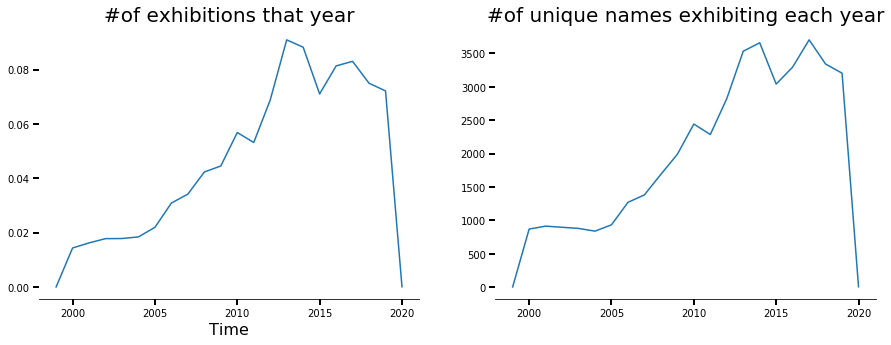

In [56]:
f, ax = plt.subplots(1,2,figsize=(15,5))

x, y = getDistribution(all_years)
ax[0].plot(x,y)
ax[0].set_xlabel('Time', fontsize = 16)
ax[0].set_title('#of exhibitions that year', fontsize = 20)


x = []
y = []
for ye, names in years_names.items():
    x.append(ye)
    y.append(len(set(names)))
    
    

ax[1].plot(x,y)
ax[0].set_xlabel('Time', fontsize = 16)
ax[1].set_title('#of unique names exhibiting each year', fontsize = 20) 


format_axis(ax[0])
format_axis(ax[1])
